### Telecom Churn case study

In [592]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [265]:
tele_data = pd.read_csv("telecom_churn_data.csv")

In [266]:
tele_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  ...  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  \
0            NaN  ...             0             0             0             0   
1           0.00  ...             0             1             0             0   
2          38.49  ...             0             0             0             0   
3           0.00  ...             0             0             0             0   
4           0.00  ...             0             0             0             0   

   sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  \
0            0            0            0            0             1   
1            0            0            2            0             0   
2            0            0            0            1             0   
3            0            0            0            0             0   
4            1            0            0            0             0   

   monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  \
0             1             1             0            0            0   
1             0             0             0            0            0   
2             0             0             0            0            0   
3             0             0             0            0            0   
4             0             0             0            0            0   

   sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  \
0            0            0        1.0        1.0        1.0        NaN   968   
1            0            0        NaN        1.0        1.0        NaN  1006   
2            0            0        NaN        NaN        NaN        1.0  1103   
3            0            0        NaN        NaN        NaN        NaN  2491   
4       

In [267]:
tele_data.shape

(99999, 226)

In [268]:
tele_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  ...  monthly_2g_6  monthly_2g_7  \
count   94621.000000   92254.000000  ...  99999.000000  99999.000000   
mean        9.971890       8.555519  ...      0.079641      0.083221   
std        64.713221      58.438186  ...      0.295058      0.304395   
min         0.000000       0.000000  ...      0.000000      0.000000   
25%         0.000000       0.000000  ...      0.000000      0.000000   
50%         0.000000       0.000000  ...      0.000000      0.000000   
75%         0.000000       0.000000  ...      0.000000      0.000000   
max      5337.040000    4428.4600

In [269]:
tele_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [270]:
tele_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  ...  monthly_2g_6  monthly_2g_7  \
count   94621.000000   92254.000000  ...  99999.000000  99999.000000   
mean        9.971890       8.555519  ...      0.079641      0.083221   
std        64.713221      58.438186  ...      0.295058      0.304395   
min         0.000000       0.000000  ...      0.000000      0.000000   
25%         0.000000       0.000000  ...      0.000000      0.000000   
50%         0.000000       0.000000  ...      0.000000      0.000000   
75%         0.000000       0.000000  ...      0.000000      0.000000   
max      5337.040000    4428.4600

### Duplicate Check on the unique column

In [271]:
tele_data['mobile_number'].nunique()

99999

In [272]:
## There are no duplicates found

## 2. Null values check

In [273]:
round(100 * (tele_data.isnull().sum()/len(tele_data.index)),2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
                            ...  
last_day_rch_amt_6           0.00
last_day_rch_amt_7           0.00
last_day_rch_amt_8           0.00
last_day_rch_amt_9           0.00
mobile_number                0.00
Length: 226, dtype: float64

In [274]:
temp = 100 * (tele_data.isnull().sum()/len(tele_data.index))

In [275]:
print('Total columns: ', len(temp))
print('Total columns that contain 50 < null values in it:', len(temp[temp > 50.0].sort_values(ascending=False)))

Total columns:  226
Total columns that contain 50 < null values in it: 40


In [276]:
# out of 226 cols there are 40 which are having 50%< rows null values. Lets take action

In [277]:
temp_df = pd.DataFrame(temp)
temp_df = temp_df.reset_index()
temp_df.head()

index        0
0   mobile_number  0.00000
1       circle_id  0.00000
2  loc_og_t2o_mou  1.01801
3  std_og_t2o_mou  1.01801
4  loc_ic_t2o_mou  1.01801

In [278]:
temp_df.columns = ['Cols','Percentage_missing']
temp_df.head()

Cols  Percentage_missing
0   mobile_number             0.00000
1       circle_id             0.00000
2  loc_og_t2o_mou             1.01801
3  std_og_t2o_mou             1.01801
4  loc_ic_t2o_mou             1.01801

In [279]:
temp_df[temp_df['Percentage_missing'] > 50]

Cols  Percentage_missing
157  date_of_last_rech_data_6           74.846748
158  date_of_last_rech_data_7           74.428744
159  date_of_last_rech_data_8           73.660737
160  date_of_last_rech_data_9           74.077741
161         total_rech_data_6           74.846748
162         total_rech_data_7           74.428744
163         total_rech_data_8           73.660737
164         total_rech_data_9           74.077741
165           max_rech_data_6           74.846748
166           max_rech_data_7           74.428744
167           max_rech_data_8           73.660737
168           max_rech_data_9           74.077741
169           count_rech_2g_6           74.846748
170           count_rech_2g_7           74.428744
171           count_rech_2g_8           73.660737
172           count_rech_2g_9           74.077741
173           count_rech_3g_6           74.846748
174           count_rech_3g_7           74.428744
175           count_rech_3g_8           73.660737
176           count_rech_3g_9           74.077741
177        av_rech_amt_data_6           74.846748
178        av_rech_amt_data_7           74.428744
179        av_rech_amt_data_8           73.660737
180        av_rech_amt_data_9           74.077741
189                 arpu_3g_6           74.846748
190                 arpu_3g_7           74.428744
191                 arpu_3g_8           73.660737
192                 arpu_3g_9           74.077741
193                 arpu_2g_6           74.846748
194                 arpu_2g_7           74.428744
195                 arpu_2g_8           73.660737
196                 arpu_2g_9           74.077741
197          night_pck_user_6           74.846748
198          night_pck_user_7           74.428744
199          night_pck_user_8           73.660737
200          night_pck_user_9           74.077741
217                 fb_user_6           74.846748
218                 fb_user_7           74.428744
219                 fb_user_8           73.660737
220                 fb_user_9           74.077741

In [280]:
null_cols = list(temp_df[temp_df['Percentage_missing'] > 50].Cols)

In [281]:
tele_data[null_cols[:18]].describe(percentiles=[0.95,.98,.99])

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
95%             8.000000           9.000000           8.000000   
98%            11.000000          12.000000          12.000000   
99%            14.000000          14.000000          14.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170       126.393392       126.729459       125.717301   
std             2.516339       108.477235       109.765267       109.437851   
min             1.000000         1.000000         1.000000         1.000000   
50%             2.000000       145.000000       145.000000       145.000000   
95%             7.000000       252.000000       252.000000       252.000000   
98%            10.000000       449.000000       449.000000       449.000000   
99%            12.000000       505.000000       455.000000       455.000000   
max            84.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count      25922.00000     25153.000000     25571.000000     26339.000000   
mean         124.94144         1.864668         2.044699         2.016288   
std          111.36376         2.570254         2.768332         2.720132   
min            1.00000         0.000000         0.000000         0.000000   
50%          145.00000         1.000000         1.000000         1.000000   
95%          252.00000         7.000000         8.000000         8.000000   
98%          348.00000        10.000000        11.000000        11.000000   
99%          455.00000        12.000000        13.000000        13.000000   
max         1555.00000        42.000000        48.000000        44.000000   

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  
count     25922.000000     25153.000000     25571.000000  
mean          1.781807         0.599133         0.621720  
std           2.214701         1.274428         1.394524  
min           0.000000         0.000000         0.000000  
50%           1.000000         0.000000         0.000000  
95%           6.000000         2.000000         2.000000  
98%           8.000000         4.000000         4.000000  
99%          10.000000         5.000000         6.000000  
max          40.000000        29.000000        35.000000

In [282]:
tele_data[null_cols[18:]].describe(percentiles=[0.95,.98,.99])

count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  \
count     26339.000000     25922.000000        25153.000000   
mean          0.635711         0.659363          192.600982   
std           1.422827         1.411513          192.646318   
min           0.000000         0.000000            1.000000   
50%           0.000000         0.000000          154.000000   
95%           2.000000         2.000000          504.000000   
98%           4.000000         4.000000          715.920000   
99%           6.000000         6.000000          907.000000   
max          45.000000        49.000000         7546.000000   

       av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  \
count        25571.000000        26339.000000        25922.000000   
mean           200.981292          197.526489          192.734315   
std            196.791224          191.301305          188.400286   
min              0.500000            0.500000            1.000000   
50%            154.000000          154.000000          164.000000   
95%            504.000000          504.000000          504.000000   
98%            756.000000          755.000000          712.900000   
99%            951.000000          951.000000          911.580000   
max           4365.000000         4076.000000         4061.000000   

          arpu_3g_6     arpu_3g_7     arpu_3g_8     arpu_3g_9     arpu_2g_6  \
count  25153.000000  25571.000000  26339.000000  25922.000000  25153.000000   
mean      89.555057     89.384120     91.173849    100.264116     86.398003   
std      193.124653    195.893924    188.180936    216.291992    172.767523   
min      -30.820000    -26.040000    -24.490000    -71.090000    -35.830000   
50%        0.480000      0.420000      0.880000      2.605000     10.830000   
95%      427.128000    428.075000    426.924000    442.627500    423.988000   
98%      650.582000    649.512000    649.181600    693.744000    601.135200   
99%      850.991600    866.950000    848.690000    894.664300    778.000000   
max     6362.280000   4980.900000   3716.900000  13884.310000   6433.760000   

          arpu_2g_7     arpu_2g_8     arpu_2g_9  night_pck_user_6  \
count  25571.000000  26339.000000  25922.000000      25153.000000   
mean      85.914450     86.599478     93.712026          0.025086   
std      176.379871    168.247852    171.384224          0.156391   
min      -15.480000    -55.830000    -45.740000          0.000000   
50%        8.810000      9.270000     14.800000          0.000000   
95%      424.340000    423.210000    424.340000          0.000000   
98%      605.948000    601.170000    601.170000          1.000000   
99%      798.174000    778.000000    797.220000          1.000000   
max     4809.360000   3483.170000   3467.170000          1.000000   

       night_pck_user_7  night_pck_user_8  night_pck_user_9     fb_user_6  \
count      25571.000000      26339.000000      25922.000000  25153.000000   
mean           0.023034          0.020844          0.015971      0.914404   
std            0.150014          0.142863          0.125366      0.279772   
min            0.000000          0.000000          0.000000      0.000000   
50%            0.000000          0.000000          0.000000      1.000000   
95%            0.000000          0.000000          0.000000      1.000000   
98%            1.000000          1.000000          0.000000      1.000000   
99%            1.000000          1.000000          1.000000      1.000000   
max            1.000000          1.000000          1.000000      1.000000   

          fb_user_7     fb_user_8     fb_user_9  
count  25571.000000  26339.000000  25922.000000  
mean       0.908764      0.890808      0.860968  
std        0.287950      0.311885      0.345987  
min        0.000000      0.000000      0.000000  
50%        1.000000      1.000000      1.000000  
95%        1.000000      1.000000      1.000000  
98%        1.000000      1.000000      1.000000  
99%        1.000000      1.00000

In [283]:
# the min value for arpu column shows in negative, lets correct this.

tele_data = tele_data[(tele_data['arpu_6'] >= 0) & (tele_data['arpu_7'] >= 0) & (tele_data['arpu_8'] >= 0) & (tele_data['arpu_9'] >= 0)]

In [284]:
tele_data.shape

(97866, 226)

In [285]:
# the min value for arpu_7 column shows in negative, lets correct this.

#tele_data = tele_data[(tele_data['arpu_3g_6'] >= 0) & (tele_data['arpu_3g_7'] >= 0) & (tele_data['arpu_3g_8'] >= 0) & (tele_data['arpu_3g_9'] >= 0) & 
#                      (tele_data['arpu_2g_6'] >= 0) & (tele_data['arpu_2g_7'] >= 0) & (tele_data['arpu_2g_8'] >= 0) & (tele_data['arpu_2g_9'] >= 0)]

In [286]:
#doing the above step we are losing 90% of the data, so we are not going to do it.

In [287]:
#tele_data.shape

In [288]:
#checking if the corelation of null value is 100% between last recharge date and number of total recharge for data.
if tele_data['av_rech_amt_data_6'].isnull().equals(tele_data['total_rech_data_6'].isnull()):
    print("last recharge and total recharge for data are null on the same rows")

last recharge and total recharge for data are null on the same rows


In [289]:
# now we can impute 0.
# if the total recharge data is 0 then average recharge amount data also would be 0.

tele_data['total_rech_data_6'].fillna(0, inplace=True)
tele_data['av_rech_amt_data_6'].fillna(0, inplace=True)

In [290]:
if tele_data['date_of_last_rech_data_7'].isnull().equals(tele_data['total_rech_data_7'].isnull()):
    print("True for 7th Month")
    tele_data['total_rech_data_7'].fillna(0, inplace=True)
if tele_data['date_of_last_rech_data_8'].isnull().equals(tele_data['total_rech_data_8'].isnull()):
    print("True for 8th Month")
    tele_data['total_rech_data_8'].fillna(0, inplace=True)

True for 7th Month
True for 8th Month


In [291]:
# if the values are missing for many columns are equal to each other then, there are more chances that these will be for the
# same row. Lets check here

if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_ic_t2o_mou_6'].isnull()):
    if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_og_t2c_mou_6'].isnull()):
        if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['og_others_6'].isnull()):
            if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_og_t2t_mou_6'].isnull()):
                if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['loc_ic_t2t_mou_6'].isnull()):
                    if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['loc_og_mou_6'].isnull()):
                        if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['loc_ic_t2f_mou_6'].isnull()):
                            if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['loc_ic_mou_6'].isnull()):
                                if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_ic_t2t_mou_6'].isnull()):
                                    if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_ic_t2m_mou_6'].isnull()):
                                        if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_ic_t2f_mou_6'].isnull()):
                                            if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_og_t2m_mou_6'].isnull()):
                                                if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_ic_mou_6'].isnull()):
                                                    if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['loc_og_t2c_mou_6'].isnull()):
                                                        if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['spl_ic_mou_6'].isnull()):
                                                            if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['isd_ic_mou_6'].isnull()):
                                                                if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['ic_others_6'].isnull()):
                                                                    if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['loc_og_t2f_mou_6'].isnull()):
                                                                        if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['loc_og_t2m_mou_6'].isnull()):
                                                                            if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['loc_og_t2t_mou_6'].isnull()):
                                                                                if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['roam_og_mou_6'].isnull()):
                                                                                    if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['roam_ic_mou_6'].isnull()):
                                                                                        if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['offnet_mou_6'].isnull()):
                                                                                            if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['onnet_mou_6'].isnull()):
                                                                                                if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_og_t2f_mou_6'].isnull()):
                                                                                                    print("Yes all Null values are same rows")
#,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,
#loc_ic_t2m_mou_6, std_ic_t2o_mou_6, std_og_t2c_mou_6, og_others_6,std_og_t2t_mou_6, loc_ic_t2t_mou_6,
#loc_og_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6
#std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6

#std_og_t2m_mou_6,loc_og_t2c_mou_6,spl_ic_mou_6,isd_ic_mou_6
#ic_others_6,loc_og_t2f_mou_6,loc_og_t2m_mou_6,loc_og_t2t_mou_6
#roam_og_mou_6,roam_ic_mou_6,offnet_mou_6,onnet_mou_6,std_og_t2f_mou_6]

Yes all Null values are same rows


In [292]:
#with the above logic we can actually conclude that all null value are same in these above columns.
#so we can treat the impute value as same.

nul_cols_6 = ['std_og_mou_6','isd_og_mou_6','spl_og_mou_6', 'loc_ic_t2m_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2c_mou_6',
'og_others_6','std_og_t2t_mou_6', 'loc_ic_t2t_mou_6', 'loc_og_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6', 
'std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_mou_6', 'std_og_t2m_mou_6','loc_og_t2c_mou_6',
'spl_ic_mou_6','isd_ic_mou_6', 'ic_others_6','loc_og_t2f_mou_6','loc_og_t2m_mou_6','loc_og_t2t_mou_6',
'roam_og_mou_6','roam_ic_mou_6','offnet_mou_6','onnet_mou_6','std_og_t2f_mou_6']

In [293]:
#checking the same row null values in all the columns
for i in nul_cols_6:
    if not tele_data[i].isnull().equals(tele_data[nul_cols_6[0]].isnull()):
        print("something wrong with: ", i)

In [294]:
nul_cols_7 = ['std_og_mou_7','isd_og_mou_7','spl_og_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_og_t2c_mou_7',
'og_others_7','std_og_t2t_mou_7', 'loc_ic_t2t_mou_7', 'loc_og_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7', 
'std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_mou_7', 'std_og_t2m_mou_7','loc_og_t2c_mou_7',
'spl_ic_mou_7','isd_ic_mou_7', 'ic_others_7','loc_og_t2f_mou_7','loc_og_t2m_mou_7','loc_og_t2t_mou_7',
'roam_og_mou_7','roam_ic_mou_7','offnet_mou_7','onnet_mou_7','std_og_t2f_mou_7']


In [295]:
#checking the same row null values in all the columns
for i in nul_cols_7:
    if not tele_data[i].isnull().equals(tele_data[nul_cols_7[0]].isnull()):
        print("something wrong with: ", i)

In [296]:
nul_cols_8 = ['std_og_mou_8','isd_og_mou_8','spl_og_mou_8', 'loc_ic_t2m_mou_8', 'std_ic_t2o_mou_8', 'std_og_t2c_mou_8',
'og_others_8','std_og_t2t_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8', 
'std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_mou_8', 'std_og_t2m_mou_8','loc_og_t2c_mou_8',
'spl_ic_mou_8','isd_ic_mou_8', 'ic_others_8','loc_og_t2f_mou_8','loc_og_t2m_mou_8','loc_og_t2t_mou_8',
'roam_og_mou_8','roam_ic_mou_8','offnet_mou_8','onnet_mou_8','std_og_t2f_mou_8']


In [297]:
#checking the same row null values in all the columns
for i in nul_cols_8:
    if not tele_data[i].isnull().equals(tele_data[nul_cols_8[0]].isnull()):
        print("something wrong with: ", i)

In [298]:
for i in nul_cols_6:
    tele_data[i].fillna(0, inplace=True)

In [299]:
for i in nul_cols_7:
    tele_data[i].fillna(0, inplace=True)

In [300]:
for i in nul_cols_8:
    tele_data[i].fillna(0, inplace=True)

In [301]:
(100 * tele_data.isnull().sum()/len(tele_data)).sort_values(ascending=False)[:40]

date_of_last_rech_data_6    74.708275
arpu_3g_6                   74.708275
count_rech_2g_6             74.708275
arpu_2g_6                   74.708275
night_pck_user_6            74.708275
max_rech_data_6             74.708275
fb_user_6                   74.708275
count_rech_3g_6             74.708275
count_rech_3g_7             74.201459
av_rech_amt_data_7          74.201459
arpu_3g_7                   74.201459
arpu_2g_7                   74.201459
date_of_last_rech_data_7    74.201459
fb_user_7                   74.201459
max_rech_data_7             74.201459
count_rech_2g_7             74.201459
night_pck_user_7            74.201459
night_pck_user_9            73.699753
arpu_3g_9                   73.699753
arpu_2g_9                   73.699753
date_of_last_rech_data_9    73.699753
total_rech_data_9           73.699753
av_rech_amt_data_9          73.699753
count_rech_3g_9             73.699753
count_rech_2g_9             73.699753
fb_user_9                   73.699753
max_rech_dat

In [302]:
tele_data.shape

(97866, 226)

In [303]:
(100 * tele_data[null_cols].isnull().sum()/len(tele_data)).sort_values(ascending=False)

date_of_last_rech_data_6    74.708275
night_pck_user_6            74.708275
count_rech_2g_6             74.708275
arpu_3g_6                   74.708275
arpu_2g_6                   74.708275
max_rech_data_6             74.708275
count_rech_3g_6             74.708275
fb_user_6                   74.708275
night_pck_user_7            74.201459
count_rech_3g_7             74.201459
date_of_last_rech_data_7    74.201459
max_rech_data_7             74.201459
arpu_3g_7                   74.201459
fb_user_7                   74.201459
count_rech_2g_7             74.201459
av_rech_amt_data_7          74.201459
arpu_2g_7                   74.201459
total_rech_data_9           73.699753
date_of_last_rech_data_9    73.699753
max_rech_data_9             73.699753
count_rech_2g_9             73.699753
fb_user_9                   73.699753
count_rech_3g_9             73.699753
arpu_3g_9                   73.699753
night_pck_user_9            73.699753
av_rech_amt_data_9          73.699753
arpu_2g_9   

In [304]:
tele_data[tele_data.filter(like='date',axis=1).columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97866 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   last_date_of_month_6      97866 non-null  object
 1   last_date_of_month_7      97265 non-null  object
 2   last_date_of_month_8      96770 non-null  object
 3   last_date_of_month_9      96215 non-null  object
 4   date_of_last_rech_6       96341 non-null  object
 5   date_of_last_rech_7       96186 non-null  object
 6   date_of_last_rech_8       94551 non-null  object
 7   date_of_last_rech_9       93381 non-null  object
 8   date_of_last_rech_data_6  24752 non-null  object
 9   date_of_last_rech_data_7  25248 non-null  object
 10  date_of_last_rech_data_8  26108 non-null  object
 11  date_of_last_rech_data_9  25739 non-null  object
dtypes: object(12)
memory usage: 9.7+ MB


In [305]:
#These dates will not imputed with any values, better drop them.

In [306]:
tele_data = tele_data.drop(['date_of_last_rech_data_6' ,'date_of_last_rech_data_6' ,'date_of_last_rech_data_6' ,'date_of_last_rech_data_6'],axis=1)

In [307]:
tele_data.shape

(97866, 225)

In [308]:
(100* tele_data[tele_data.columns].isnull().sum()/len(tele_data)).sort_values(ascending=False)

fb_user_6           74.708275
count_rech_2g_6     74.708275
night_pck_user_6    74.708275
count_rech_3g_6     74.708275
max_rech_data_6     74.708275
                      ...    
total_ic_mou_7       0.000000
total_ic_mou_6       0.000000
std_ic_mou_8         0.000000
std_ic_mou_7         0.000000
mobile_number        0.000000
Length: 225, dtype: float64

In [309]:
more_nul_cols = ['fb_user_6','count_rech_2g_6','night_pck_user_6','count_rech_3g_6','max_rech_data_6','arpu_2g_6','arpu_3g_6',
'max_rech_data_7','arpu_3g_7','av_rech_amt_data_7','night_pck_user_7','arpu_2g_7','fb_user_7','count_rech_3g_7',
'count_rech_2g_7','date_of_last_rech_data_7','arpu_3g_9','arpu_2g_9','date_of_last_rech_data_9','total_rech_data_9',
'night_pck_user_9','count_rech_3g_9','count_rech_2g_9','av_rech_amt_data_9','max_rech_data_9','fb_user_9',
'date_of_last_rech_data_8','night_pck_user_8','av_rech_amt_data_8','count_rech_3g_8','fb_user_8','arpu_3g_8',
'count_rech_2g_8','arpu_2g_8','max_rech_data_8']

In [310]:
(100 * tele_data[more_nul_cols].isnull().sum()/len(tele_data))

fb_user_6                   74.708275
count_rech_2g_6             74.708275
night_pck_user_6            74.708275
count_rech_3g_6             74.708275
max_rech_data_6             74.708275
arpu_2g_6                   74.708275
arpu_3g_6                   74.708275
max_rech_data_7             74.201459
arpu_3g_7                   74.201459
av_rech_amt_data_7          74.201459
night_pck_user_7            74.201459
arpu_2g_7                   74.201459
fb_user_7                   74.201459
count_rech_3g_7             74.201459
count_rech_2g_7             74.201459
date_of_last_rech_data_7    74.201459
arpu_3g_9                   73.699753
arpu_2g_9                   73.699753
date_of_last_rech_data_9    73.699753
total_rech_data_9           73.699753
night_pck_user_9            73.699753
count_rech_3g_9             73.699753
count_rech_2g_9             73.699753
av_rech_amt_data_9          73.699753
max_rech_data_9             73.699753
fb_user_9                   73.699753
date_of_last

In [311]:
tele_data[more_nul_cols].describe(percentiles=[.95,.98,.99])

fb_user_6  count_rech_2g_6  night_pck_user_6  count_rech_3g_6  \
count  24752.000000     24752.000000      24752.000000     24752.000000   
mean       0.914229         1.867122          0.024968         0.597729   
std        0.280031         2.572106          0.156030         1.268228   
min        0.000000         0.000000          0.000000         0.000000   
50%        1.000000         1.000000          0.000000         0.000000   
95%        1.000000         7.000000          0.000000         2.000000   
98%        1.000000        10.000000          1.000000         4.000000   
99%        1.000000        12.000000          1.000000         5.000000   
max        1.000000        42.000000          1.000000        29.000000   

       max_rech_data_6     arpu_2g_6     arpu_3g_6  max_rech_data_7  \
count     24752.000000  24752.000000  24752.000000     25248.000000   
mean        126.303935     86.300738     89.498382       126.644368   
std         108.339162    173.155766    193.399617       109.341581   
min           1.000000    -35.830000    -30.820000         1.000000   
50%         145.000000     10.700000      0.450000       145.000000   
95%         252.000000    423.989000    427.394000       252.000000   
98%         449.000000    601.170000    650.893800       449.000000   
99%         455.000000    778.000000    852.746300       455.000000   
max        1555.000000   6433.760000   6362.280000      1555.000000   

          arpu_3g_7  av_rech_amt_data_7  night_pck_user_7     arpu_2g_7  \
count  25248.000000        25248.000000      25248.000000  25248.000000   
mean      89.441433          201.308286          0.023170     85.974596   
std      196.372794          197.114552          0.150447    176.712008   
min      -26.040000            0.500000          0.000000    -15.480000   
50%        0.400000          154.000000          0.000000      8.810000   
95%      428.679000          504.000000          0.000000    424.340000   
98%      650.563000          756.000000          1.000000    609.512600   
99%      867.203000          951.000000          1.000000    797.220000   
max     4980.900000         4365.000000          1.000000   4809.360000   

          fb_user_7  count_rech_3g_7  count_rech_2g_7     arpu_3g_9  \
count  25248.000000     25248.000000     25248.000000  25739.000000   
mean       0.908824         0.620604         2.051925    100.258894   
std        0.287864         1.379718         2.776193    216.523630   
min        0.000000         0.000000         0.000000    -71.090000   
50%        1.000000         0.000000         1.000000      2.590000   
95%        1.000000         2.000000         8.000000    442.580000   
98%        1.000000         4.000000        11.000000    692.984800   
99%        1.000000         6.000000        13.000000    895.554800   
max        1.000000        34.000000        48.000000  13884.310000   

          arpu_2g_9  total_rech_data_9  night_pck_user_9  count_rech_3g_9  \
count  25739.000000       25739.000000      25739.000000     25739.000000   
mean      93.644712           2.443568          0.016046         0.658417   
std      171.383470           2.518259          0.125654         1.410649   
min      -45.740000           1.000000          0.000000         0.000000   
50%       14.700000           2.000000          0.000000         0.000000   
95%      424.340000           7.000000          0.000000         2.000000   
98%      601.170000          10.000000          0.000000         4.000000   
99%      796.224400          12.000000          1.000000         6.000000   
max     3467.170000          84.000000          1.000000        49.000000   

       count_rech_2g_9  av_rech_amt_data_9  max_rech_data_9     fb_user_9  \
count     25739.000000        25739.000000     25739.000000  25739.000000   
mean          1.785151          192.779747       124.870741      0.860678   
std           2.216819          188.414576       111.298654      0.346289   
min    

In [312]:
tele_data1 = tele_data.copy()

In [313]:
tele_data1.shape

(97866, 225)

In [314]:
#tele_data1.filter(like='date', axis=1).columns

In [315]:
#tele_data1.drop(tele_data1.filter(like='date', axis=1).columns, axis=1)

#### Getting columns related to data service to impute, it might be the customer not have used the particular service, so assuming that we can impute the below columns to zero.

In [316]:

cols_to_treat_mis = ['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                  'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
                  'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                  'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9']

In [317]:
#'fb_user_6','fb_user_7','fb_user_8','fb_user_9'
# The above sequence is used to compare the null rows in each month columns

#June
for i in cols_to_treat_mis:
    if i.find('6') != -1:
        if not tele_data1[i].isnull().equals(tele_data1[cols_to_treat_mis[0]].isnull()):
            print('Null value for the row in ', i, ' is not matching to ', cols_to_treat_mis[0])

#July            
for i in cols_to_treat_mis:
    if i.find('7') != -1:
        if not tele_data1[i].isnull().equals(tele_data1[cols_to_treat_mis[1]].isnull()):
            print('Null value for the row in ', i, ' is not matching to ', cols_to_treat_mis[0])

#August            
for i in cols_to_treat_mis:
    if i.find('8') != -1:
        if not tele_data1[i].isnull().equals(tele_data1[cols_to_treat_mis[2]].isnull()):
            print('Null value for the row in ', i, ' is not matching to ', cols_to_treat_mis[0])
            
#September
for i in cols_to_treat_mis:
    if i.find('9') != -1:
        if not tele_data1[i].isnull().equals(tele_data1[cols_to_treat_mis[3]].isnull()):
            print('Null value for the row in ', i, ' is not matching to ', cols_to_treat_mis[0])

In [318]:
(100 * tele_data1.isnull().sum()/len(tele_data1)).sort_values(ascending=False)

fb_user_6           74.708275
count_rech_2g_6     74.708275
night_pck_user_6    74.708275
count_rech_3g_6     74.708275
max_rech_data_6     74.708275
                      ...    
total_ic_mou_7       0.000000
total_ic_mou_6       0.000000
std_ic_mou_8         0.000000
std_ic_mou_7         0.000000
mobile_number        0.000000
Length: 225, dtype: float64

#### As the % of missing values showing slight variation in each month of the data, we can impute 0 instead null to those columns

In [319]:
for j in cols_to_treat_mis:
    tele_data1[j].fillna(0, inplace=True)

In [320]:
tele_data1.shape

(97866, 225)

In [321]:
(100 * tele_data1.isnull().sum()/len(tele_data1)).sort_values(ascending=False)

max_rech_data_6             74.708275
max_rech_data_7             74.201459
date_of_last_rech_data_7    74.201459
av_rech_amt_data_7          74.201459
total_rech_data_9           73.699753
                              ...    
total_rech_num_8             0.000000
total_rech_num_7             0.000000
total_rech_num_6             0.000000
ic_others_8                  0.000000
mobile_number                0.000000
Length: 225, dtype: float64

In [322]:
tele_data1.rename(columns = {'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8',
                          'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [323]:
tele_data1[cols_to_treat_mis].describe(percentiles=[.95,.98,.99])

fb_user_6     fb_user_7     fb_user_8     fb_user_9  \
count  97866.000000  97866.000000  97866.000000  97866.000000   
mean       0.231224      0.234463      0.237713      0.226361   
std        0.421618      0.423665      0.425684      0.418477   
min        0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000   
95%        1.000000      1.000000      1.000000      1.000000   
98%        1.000000      1.000000      1.000000      1.000000   
99%        1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000   

       count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  \
count     97866.000000     97866.000000     97866.000000     97866.000000   
mean          0.472227         0.529367         0.539115         0.469499   
std           1.527055         1.671616         1.667707         1.382077   
min           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
95%           3.000000         3.000000         3.000000         3.000000   
98%           6.000000         6.000000         6.000000         5.000000   
99%           8.000000         9.000000         9.000000         7.000000   
max          42.000000        48.000000        44.000000        40.000000   

       count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  \
count     97866.000000     97866.000000     97866.000000     97866.000000   
mean          0.151176         0.160107         0.169528         0.173165   
std           0.688687         0.751546         0.786102         0.779340   
min           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
95%           1.000000         1.000000         1.000000         1.000000   
98%           2.000000         2.000000         2.000000         2.000000   
99%           3.000000         3.000000         3.000000         3.000000   
max          29.000000        34.000000        45.000000        49.000000   

       night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  \
count      97866.000000      97866.000000      97866.000000      97866.000000   
mean           0.006315          0.005978          0.005579          0.004220   
std            0.079215          0.077084          0.074485          0.064825   
min            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
95%            0.000000          0.000000          0.000000          0.000000   
98%            0.000000          0.000000          0.000000          0.000000   
99%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

          arpu_3g_6     arpu_3g_7     arpu_3g_8     arpu_3g_9     arpu_2g_6  \
count  97866.000000  97866.000000  97866.000000  97866.000000  97866.000000   
mean      22.635685     23.074585     24.339373     26.368337     21.826946   
std      104.752953    107.142964    105.392396    119.491618     94.816924   
min      -30.820000    -26.040000    -24.490000    -71.090000    -35.830000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
95%      153.142500    155.820000    192.960000    212.040000    151.110000   
98%      305.013000    311.227000    331.242000    371.680000    262.077000   
99%      462.625500    465.952500    477.321000    511.469000    424.340000   
max     6362.280000   4980.900000   3716.900000  13884.310000   6433.760000   

          arpu_2g_7     arpu_2g_8     arpu_2g_9  
count  97866.000000  97866.000000  97866.000000  
mean      22.180191     23.092237     24.628791  
std       97.318522     94.957029     97.080177  
min      -15.48

In [324]:
#now we can simply drop the null values

tele_data1.shape

(97866, 225)

In [325]:
(100 * tele_data1.isnull().sum()/len(tele_data1)).sort_values(ascending=False)

max_rech_data_6             74.708275
max_rech_data_7             74.201459
date_of_last_rech_data_7    74.201459
av_rech_amt_data_7          74.201459
total_rech_data_9           73.699753
                              ...    
total_rech_num_8             0.000000
total_rech_num_7             0.000000
total_rech_num_6             0.000000
ic_others_8                  0.000000
mobile_number                0.000000
Length: 225, dtype: float64

## 3. Derive new features

In [326]:
tele_data2 = tele_data1.copy()

In [327]:
tele_data2.shape

(97866, 225)

In [328]:
#lets create few new variables which will be useful for us.

In [329]:
#calculating total recharge amount for data

tele_data2['total_amt_rech_data_6'] = tele_data2['total_rech_data_6'] * tele_data2['av_rech_amt_data_6']
tele_data2['total_amt_rech_data_7'] = tele_data2['total_rech_data_7'] * tele_data2['av_rech_amt_data_7']
tele_data2['total_amt_rech_data_8'] = tele_data2['total_rech_data_8'] * tele_data2['av_rech_amt_data_8']
tele_data2['total_amt_rech_data_9'] = tele_data2['total_rech_data_9'] * tele_data2['av_rech_amt_data_9']

In [330]:
tele_data2.filter(like='total', axis=1).columns

Index(['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
       'total_amt_rech_data_6', 'total_amt_rech_data_7',
       'total_amt_rech_data_8', 'total_amt_rech_data_9'],
      dtype='object')

In [331]:
tele_data2['avg_rech_amt_6_7'] =  tele_data2[['total_amt_rech_data_6', 'total_amt_rech_data_7', 'total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1)

In [332]:
print('Considering the high value customer to filter the cut off value: ', tele_data2['avg_rech_amt_6_7'].quantile(0.7))

Considering the high value customer to filter the cut off value:  290.0


In [333]:
high_val_cust = tele_data2[tele_data2['avg_rech_amt_6_7'] >= 290]

In [334]:
high_val_cust = high_val_cust.reset_index(drop=True)

In [335]:
high_val_cust.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000701601        109             0.0             0.0             0.0   
1     7001524846        109             0.0             0.0             0.0   
2     7000875565        109             0.0             0.0             0.0   
3     7002124215        109             0.0             0.0             0.0   
4     7000887461        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
1            9/30/2014   378.721   492.223   137.362  166.787       413.69   
2            9/30/2014   430.975   299.869   187.894  206.490        50.51   
3            9/30/2014   514.453   597.753   637.760  578.596       102.41   
4            9/30/2014    74.350   193.897   366.966  811.480        48.96   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0        54.68        52.29          NaN        453.43        567.16   
1       351.03        35.08        33.46         94.66         80.63   
2        74.01        70.61        31.34        296.29        229.74   
3       132.11        85.14       161.63        757.93        896.68   
4        50.66        33.58        15.74         85.41         89.36   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0        325.91           NaN          16.23          33.49          31.64   
1        136.48        108.71           0.00           0.00           0.00   
2        162.76        224.39           0.00           2.83           0.00   
3        983.39        869.89           0.00           0.00           0.00   
4        205.89        111.88           0.00           0.00           0.00   

   roam_ic_mou_9  ...  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  \
0            NaN  ...            0            0            0             0   
1            0.0  ...            1            3            0             0   
2            0.0  ...            0            0            0             0   
3            0.0  ...            0            0            0             0   
4            0.0  ...            0            0            0             0   

   monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  \
0             0             0             0            0            0   
1             0             0             0            0            0   
2             0             0             0            0            0   
3             0             0             0            0            0   
4             2             1             1            0            0   

   sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9  aon  \
0            0            0        0.0        0.0        0.0        0.0  802   
1            0            0        0.0        1.0        1.0        0.0  315   
2            0            0        0.0        0.0        0.0        0.0  511   
3            0            0        0.0        0.0        0.0        0.0  720   
4            1            0        0.0        1.0        1.0        1.0  604   

   vbc_3g_8  vbc_3g_7  vbc_3g_6  vbc_3g_9  total_amt_rech_data_6  \
0     57.74     19.38     18.74       0.0                    0.0   
1     21.03    910.65    122.16       0.0                    0.0   
2      0.00      2.45     21.89       0.0                    0.0   
3      0.00      0.00      0.00       0.0                    0.0   
4     40.45     51.

In [336]:
high_val_cust.shape

(29433, 230)

In [337]:
tele_data2.shape

(97866, 230)

In [338]:
tele_data3 = high_val_cust.copy()

## Create Target variable

In [339]:
#creating target column for 9th month, - Total rechare amount = no of recharge * average amt of recharge

tele_data3['churned'] = '0'

In [340]:
tele_data3['usage_9'] = tele_data3['total_og_mou_9'] + tele_data3['total_ic_mou_9'] + tele_data3['vol_2g_mb_9'] + tele_data3['vol_3g_mb_9']

In [341]:
tele_data3['usage_9'].head()

0       0.00
1     177.09
2     590.30
3    1284.14
4     583.78
Name: usage_9, dtype: float64

In [342]:
tele_data3['churned'] = tele_data3['usage_9'].apply(lambda x: 1 if x == 0 else 0)

In [343]:
tele_data3['churned'].head()

0    1
1    0
2    0
3    0
4    0
Name: churned, dtype: int64

### Lets drop all the columns for 9th month as we have created the target column

In [344]:
tele_data3.filter(like='_9', axis=1).columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [345]:
tele_data3 = tele_data3.drop(tele_data3.filter(like='_9', axis=1).columns, axis=1)

In [346]:
tele_data3.shape

(29433, 175)

In [347]:
round(100 * tele_data3.isnull().sum()/len(tele_data3), 2).sort_values(ascending=False)[:20]

date_of_last_rech_data_8    50.90
av_rech_amt_data_8          50.90
max_rech_data_8             50.90
total_amt_rech_data_8       50.90
total_amt_rech_data_7       50.57
max_rech_data_7             50.57
av_rech_amt_data_7          50.57
date_of_last_rech_data_7    50.57
max_rech_data_6             48.53
date_of_last_rech_8          1.81
last_date_of_month_8         0.59
loc_ic_t2o_mou               0.58
std_og_t2o_mou               0.58
loc_og_t2o_mou               0.58
date_of_last_rech_7          0.35
date_of_last_rech_6          0.19
last_date_of_month_7         0.12
std_og_mou_7                 0.00
isd_og_mou_8                 0.00
isd_og_mou_7                 0.00
dtype: float64

In [348]:
# We are dropping these date value, because we cant impute these fields

tele_data3 = tele_data3.drop(['date_of_last_rech_data_8', 'date_of_last_rech_data_7'], axis=1)
tele_data3.shape

(29433, 173)

In [349]:
if tele_data3['av_rech_amt_data_8'].isnull().equals(tele_data3['total_amt_rech_data_8'].isnull()):
    pass
else:
    print('imputation not succes -1')
    
    
if tele_data3['max_rech_data_6'].isnull().equals(tele_data3['total_amt_rech_data_6'].isnull()):
    pass
else:
    print('imputation not succes -2')
    
    
if tele_data3['max_rech_data_7'].isnull().equals(tele_data3['total_amt_rech_data_7'].isnull()):
    pass
else:
    print('imputation not succes -3')
    
    
if tele_data3['max_rech_data_8'].isnull().equals(tele_data3['total_amt_rech_data_8'].isnull()):
    pass
else:
    print('imputation not succes -4')
    
    
if tele_data3['av_rech_amt_data_7'].isnull().equals(tele_data3['total_amt_rech_data_7'].isnull()):
    pass
else:
    print('imputation not succes -5')        

imputation not succes -2


In [350]:
tele_data3['av_rech_amt_data_8'].fillna(0, inplace=True) 
tele_data3['total_amt_rech_data_8'].fillna(0, inplace=True)

#tele_data3['max_rech_data_6'].fillna(0, inplace=True)
tele_data3['max_rech_data_7'].fillna(0, inplace=True)
tele_data3['max_rech_data_8'].fillna(0, inplace=True)

tele_data3['av_rech_amt_data_7'].fillna(0, inplace=True)
tele_data3['total_amt_rech_data_7'].fillna(0, inplace=True)
    

In [351]:
round(100 * tele_data3.isnull().sum()/len(tele_data3), 2).sort_values(ascending=False)[:20]

max_rech_data_6         48.53
date_of_last_rech_8      1.81
last_date_of_month_8     0.59
loc_og_t2o_mou           0.58
std_og_t2o_mou           0.58
loc_ic_t2o_mou           0.58
date_of_last_rech_7      0.35
date_of_last_rech_6      0.19
last_date_of_month_7     0.12
churned                  0.00
og_others_7              0.00
og_others_6              0.00
spl_og_mou_8             0.00
spl_og_mou_7             0.00
spl_og_mou_6             0.00
isd_og_mou_8             0.00
std_og_mou_8             0.00
isd_og_mou_7             0.00
isd_og_mou_6             0.00
total_og_mou_6           0.00
dtype: float64

In [352]:
tele_data3['max_rech_data_6'].fillna(0, inplace=True)

In [353]:
round(100 * tele_data3.isnull().sum()/len(tele_data3), 2).sort_values(ascending=False)[:20]

date_of_last_rech_8     1.81
last_date_of_month_8    0.59
loc_og_t2o_mou          0.58
std_og_t2o_mou          0.58
loc_ic_t2o_mou          0.58
date_of_last_rech_7     0.35
date_of_last_rech_6     0.19
last_date_of_month_7    0.12
churned                 0.00
og_others_8             0.00
og_others_7             0.00
og_others_6             0.00
spl_og_mou_8            0.00
spl_og_mou_7            0.00
spl_og_mou_6            0.00
isd_og_mou_6            0.00
isd_og_mou_8            0.00
isd_og_mou_7            0.00
total_og_mou_7          0.00
std_og_mou_8            0.00
dtype: float64

In [354]:
tele_data3 = tele_data3.dropna()

In [355]:
tele_data3.shape

(28651, 173)

In [356]:
# Delete all the date column

In [357]:
tele_data3.filter(like='date').columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
      dtype='object')

In [358]:
tele_data3 = tele_data3.drop(tele_data3.filter(like='date').columns, axis=1)

In [359]:
# lets get all the total
tele_data3.shape

(28651, 167)

In [360]:
sorted(tele_data3.columns)

['aon',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'avg_rech_amt_6_7',
 'churned',
 'circle_id',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2o_mou',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc

In [361]:
# average revenue per user is captured in  'arpu_6' so we can drop prefixed 'arpu_' features.

In [362]:
tele_data3 = tele_data3.drop(['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',], axis=1)

In [363]:
tele_data3.shape

(28651, 161)

In [364]:
### Also in the same way we can drop columns which was added to the total to another column.

In [365]:
to_be_droped = ['circle_id', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
 'count_rech_3g_8','vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8','std_og_mou_6',
 'std_og_mou_7', 'std_og_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2o_mou',
 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8','std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2o_mou',
 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',    'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
 'loc_ic_t2o_mou', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'last_day_rch_amt_6','last_day_rch_amt_7',
 'last_day_rch_amt_8']
len(to_be_droped)

76

In [366]:
tele_data4 = tele_data3.drop(to_be_droped, axis=1)
tele_data4.shape

(28651, 85)

In [367]:
tele_data4.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28651 entries, 0 to 29432
Data columns (total 85 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mobile_number          28651 non-null  int64  
 1   arpu_6                 28651 non-null  float64
 2   arpu_7                 28651 non-null  float64
 3   arpu_8                 28651 non-null  float64
 4   onnet_mou_6            28651 non-null  float64
 5   onnet_mou_7            28651 non-null  float64
 6   onnet_mou_8            28651 non-null  float64
 7   offnet_mou_6           28651 non-null  float64
 8   offnet_mou_7           28651 non-null  float64
 9   offnet_mou_8           28651 non-null  float64
 10  roam_ic_mou_6          28651 non-null  float64
 11  roam_ic_mou_7          28651 non-null  float64
 12  roam_ic_mou_8          28651 non-null  float64
 13  roam_og_mou_6          28651 non-null  float64
 14  roam_og_mou_7          28651 non-null  float64
 15  ro

In [368]:
for i in tele_data4.columns:
    print('Unique values in ', i, ' is ' ,len(tele_data4[i].value_counts()))

Unique values in  mobile_number  is  28651
Unique values in  arpu_6  is  27977
Unique values in  arpu_7  is  28023
Unique values in  arpu_8  is  27375
Unique values in  onnet_mou_6  is  17051
Unique values in  onnet_mou_7  is  17142
Unique values in  onnet_mou_8  is  16100
Unique values in  offnet_mou_6  is  21005
Unique values in  offnet_mou_7  is  21127
Unique values in  offnet_mou_8  is  20136
Unique values in  roam_ic_mou_6  is  4014
Unique values in  roam_ic_mou_7  is  3388
Unique values in  roam_ic_mou_8  is  3455
Unique values in  roam_og_mou_6  is  4705
Unique values in  roam_og_mou_7  is  4019
Unique values in  roam_og_mou_8  is  4059
Unique values in  isd_og_mou_6  is  1006
Unique values in  isd_og_mou_7  is  1028
Unique values in  isd_og_mou_8  is  881
Unique values in  spl_og_mou_6  is  2991
Unique values in  spl_og_mou_7  is  3286
Unique values in  spl_og_mou_8  is  3161
Unique values in  og_others_6  is  839
Unique values in  og_others_7  is  107
Unique values in  og_othe

In [369]:
for i in ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']:
    print(i, ' values: ', tele_data4[i].value_counts())

monthly_2g_6  values:  0    24651
1     3444
2      522
3       28
4        6
Name: monthly_2g_6, dtype: int64
monthly_2g_7  values:  0    24729
1     3276
2      607
3       32
4        5
5        2
Name: monthly_2g_7, dtype: int64
monthly_2g_8  values:  0    25085
1     3209
2      319
3       29
4        7
5        2
Name: monthly_2g_8, dtype: int64
monthly_3g_6  values:  0     24636
1      2879
2       782
3       223
4        74
5        30
6        10
7         9
8         3
11        2
9         2
14        1
Name: monthly_3g_6, dtype: int64
monthly_3g_7  values:  0     24677
1      2648
2       944
3       218
4        73
5        42
6        25
7         9
8         5
9         4
11        2
14        1
12        1
10        1
16        1
Name: monthly_3g_7, dtype: int64
monthly_3g_8  values:  0     24758
1      2722
2       801
3       219
4        87
5        32
6        14
7         9
9         3
8         3
10        2
16        1
Name: monthly_3g_8, dtype: int64


In [370]:
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

In [371]:
tele_data4[cat_cols] = tele_data4[cat_cols].astype(int)

In [372]:
tele_data4.shape

(28651, 85)

In [373]:
num_cols = set(tele_data4.columns).difference(set(cat_cols))

In [374]:
num_cols.remove('churned')

In [375]:
len(num_cols)

78

### Data Visulization

In [376]:
tele_data_vis = tele_data4.copy()
#for backup

In [377]:
#tele_data4 = tele_data_vis.copy()

<AxesSubplot:title={'center':'1 - Churned, 0 - not churned'}, ylabel='churned'>

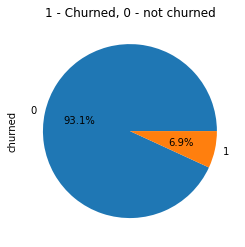

In [378]:
tele_data4['churned'].value_counts().plot.pie(title='1 - Churned, 0 - not churned',autopct='%1.1f%%')

In [379]:
# Got a imbalanced dataset, we should be treating this later below.

In [380]:
co_relation = tele_data4.corr()

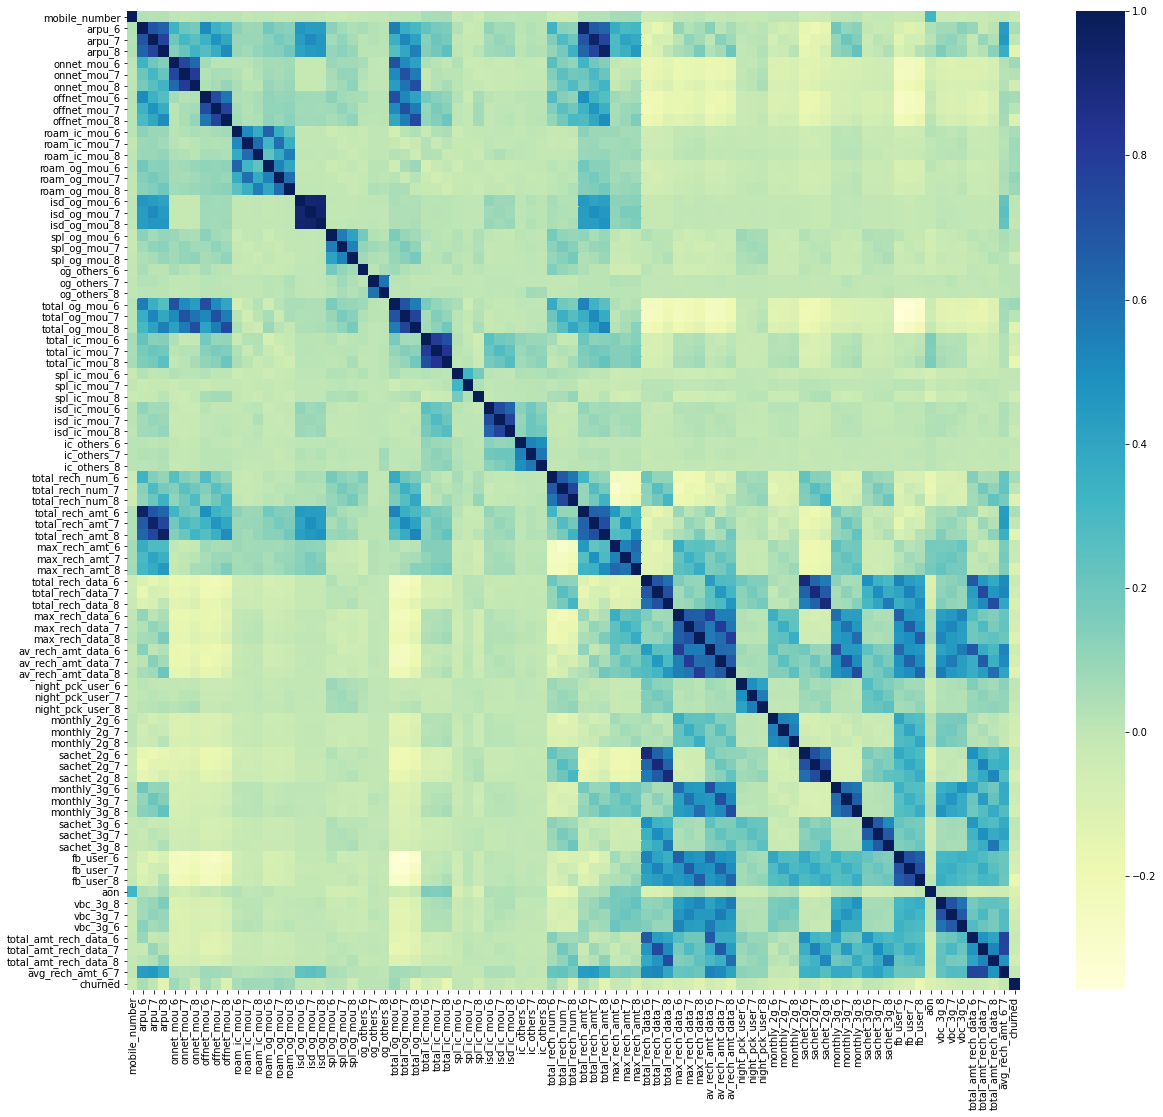

In [381]:
plt.figure(figsize=(20,18))
sns.heatmap(co_relation, cmap="YlGnBu", annot=False)
plt.show()

#### From the above heatmap we can see that some co-relation is beween total columns with its contributor columns

In [382]:
tele_data4[num_cols].describe(percentiles=[.95,.98,.99])

av_rech_amt_data_6  monthly_2g_7  max_rech_amt_8   sachet_3g_6  \
count        28651.000000  28651.000000    28651.000000  28651.000000   
mean           122.690838      0.161111      162.261073      0.205508   
std            199.749902      0.433272      170.215804      0.983103   
min              0.000000      0.000000        0.000000      0.000000   
50%             23.000000      0.000000      130.000000      0.000000   
95%            463.500000      1.000000      455.000000      1.000000   
98%            655.000000      2.000000      619.000000      2.000000   
99%            805.500000      2.000000      899.000000      4.000000   
max           7546.000000      5.000000     4449.000000     29.000000   

       spl_og_mou_8  total_rech_amt_8  max_rech_amt_7   og_others_6  \
count  28651.000000      28651.000000    28651.000000  28651.000000   
mean       6.772747        607.182960      168.621235      0.682384   
std       22.089550        610.709483      174.027714      4.199284   
min        0.000000          0.000000        0.000000      0.000000   
50%        0.580000        508.000000      128.000000      0.000000   
95%       29.890000       1502.000000      455.000000      3.980000   
98%       50.190000       1972.000000      655.000000      6.640000   
99%       72.300000       2362.000000     1000.000000      8.995000   
max     1390.880000      45320.000000     3100.000000    609.810000   

       roam_ic_mou_8  total_amt_rech_data_6  max_rech_amt_6  \
count   28651.000000           28651.000000    28651.000000   
mean       13.160435             446.721424      165.392691   
std        75.789057            1437.532997      164.735873   
min         0.000000               0.000000        0.000000   
50%         0.000000              23.000000      120.000000   
95%        60.535000            2060.000000      455.000000   
98%       169.340000            3600.000000      599.000000   
99%       290.885000            5180.000000     1000.000000   
max      4169.810000          105644.000000     3559.000000   

       total_rech_data_8  max_rech_data_8  monthly_3g_6   ic_others_6  \
count        28651.00000     28651.000000  28651.000000  28651.000000   
mean             1.57457        66.879550      0.201005      1.129923   
std              3.02171       108.032693      0.602016     11.776159   
min              0.00000         0.000000      0.000000      0.000000   
50%              0.00000         0.000000      0.000000      0.000000   
95%              7.00000       252.000000      1.000000      3.510000   
98%             11.00000       252.000000      2.000000     10.410000   
99%             13.50000       455.000000      3.000000     20.220000   
max             60.00000      1555.000000     14.000000   1178.990000   

       monthly_3g_8  isd_og_mou_7  offnet_mou_6  isd_ic_mou_7        arpu_7  \
count  28651.000000  28651.000000  28651.000000   28651.00000  28651.000000   
mean       0.199749      2.144047    388.941229      12.04808    574.771579   
std        0.613457     46.281363    477.838156      77.49914    477.809440   
min        0.000000      0.000000      0.000000       0.00000      0.000000   
50%        0.000000      0.000000    247.080000       0.00000    490.931000   
95%        1.000000      0.760000   1263.910000      47.98500   1268.644000   
98%        2.000000     12.010000   1824.590000     132.08000   1648.320000   
99%        3.000000     38.145000   2303.690000     237.37000   1999.944000   
max       16.000000   5490.280000   8362.360000    4747.91000  35145.834000   

       total_rech_data_7   sachet_3g_7  spl_og_mou_6  monthly_3g_7  \
count       28651.000000  28651.000000  28651.000000  28651.000000   
mean            1.754110      0.218806      5.875333      0.211336   
std             3.144017      1.077540     17.744740      0.653821   
min             0.000000      0.000000      0.000000      0.000000   
50%             0.000000      0.000000      0.300000      0.00

In [383]:
tele_data4['arpu_8'].quantile(.99) 

1990.017

In [384]:
len(tele_data4[tele_data4['arpu_8'] > 1990.017])

287

In [385]:
round(100 * 287/len(tele_data4),2)

1.0

In [386]:
def out_cut(df,cut_of):
    df_result = pd.DataFrame(columns=["columns","no_of_rows_to_lose","percentage_of_rows_to_lose"])
    df_temp=pd.DataFrame()
    
    for col in df.columns:
        cut_off = df[col].quantile(cut_of)
        no_of_rows_to_lose = len(df[df[col] >= cut_off])
        per_of_rows_to_lose = round(100 * no_of_rows_to_lose/len(df),2)
        df_temp['columns'] = [col]
        df_temp['no_of_rows_to_lose'] = no_of_rows_to_lose
        df_temp['percentage_of_rows_to_lose'] = per_of_rows_to_lose
        df_result = df_result.append(df_temp)
        
    df_result.sort_values('percentage_of_rows_to_lose', ascending=False, inplace=True)
    df_result.set_index('columns', inplace=True)
    return df_result

In [387]:
out_cut(tele_data4[num_cols],0.99)[:20]

no_of_rows_to_lose  percentage_of_rows_to_lose
columns                                                        
og_others_7                   28651                      100.00
og_others_8                   28651                      100.00
monthly_2g_7                    646                        2.25
monthly_2g_6                    556                        1.94
aon                             519                        1.81
sachet_3g_8                     393                        1.37
max_rech_data_8                 393                        1.37
sachet_2g_7                     386                        1.35
monthly_3g_7                    382                        1.33
monthly_3g_8                    370                        1.29
max_rech_data_7                 369                        1.29
max_rech_data_6                 365                        1.27
monthly_2g_8                    357                        1.25
monthly_3g_6                    354                        1.24
max_rech_amt_7                  340                        1.19
sachet_2g_8                     336                        1.17
sachet_3g_6                     329                        1.15
sachet_2g_6                     315                        1.10
max_rech_amt_6                  312                        1.09
total_rech_num_8                309                        1.08

#### This looks good, we can apply outlier treatment 99> not 99>= as 99>= is dropping many rows.

In [388]:
tele_data4['og_others_7'].value_counts()

0.00    28507
0.38        4
0.05        4
0.16        4
1.61        3
        ...  
6.83        1
7.68        1
0.53        1
2.50        1
0.15        1
Name: og_others_7, Length: 107, dtype: int64

In [389]:
tele_data4['og_others_8'].value_counts()

0.00     28487
0.16         7
2.26         4
0.01         3
0.11         3
         ...  
73.73        1
1.28         1
3.29         1
0.71         1
4.44         1
Name: og_others_8, Length: 124, dtype: int64

In [390]:
tele_data4['og_others_6'].value_counts()

0.00     21994
0.21       148
0.43        64
0.56        53
0.20        52
         ...  
15.61        1
9.99         1
9.91         1
13.51        1
15.89        1
Name: og_others_6, Length: 839, dtype: int64

In [391]:
#### it is not going to be useful for further analaysis having 95% of data is 0. lets drop them

In [392]:
tele_data4 = tele_data4.drop(['og_others_6','og_others_7', 'og_others_8'], axis=1)

In [393]:
tele_data5 = tele_data4.copy()

In [394]:
tele_data5.shape

(28651, 82)

In [395]:
num_cols.remove('og_others_6')
num_cols.remove('og_others_7')
num_cols.remove('og_others_8')

In [396]:
for col in tele_data5[num_cols].columns:
    tele_data5 = tele_data5[tele_data5[col] <= tele_data5[col].quantile(.99)]

In [397]:
tele_data5.describe(percentiles=[.95,.98,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   1.483300e+04  14833.000000  14833.000000  14833.000000  14833.000000   
mean    7.001206e+09    466.114719    452.046083    403.385047    221.856484   
std     6.788396e+05    208.509729    205.187367    235.092142    295.855445   
min     7.000000e+09      0.000000      0.000000      0.000000      0.000000   
50%     7.001204e+09    452.498000    440.371000    391.852000     98.090000   
95%     7.002265e+09    843.183400    820.202600    815.088000    896.794000   
98%     7.002338e+09    950.509640    925.407560    937.560880   1150.843200   
99%     7.002363e+09   1026.373800    988.668040   1048.218120   1291.882400   
max     7.002387e+09   1325.496000   1396.714000   1406.832000   1635.680000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  14833.000000  14833.000000  14833.000000  14833.000000  14833.000000   
mean     220.787295    188.780679    320.352569    313.612016    271.030651   
std      295.688920    275.100198    304.025519    293.933621    267.278997   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       93.810000     73.340000    237.240000    231.510000    191.610000   
95%      910.860000    822.478000    943.218000    923.842000    836.978000   
98%     1138.709600   1093.543200   1200.090000   1139.219600   1032.898800   
99%     1283.199600   1253.251200   1366.675200   1280.493200   1146.050400   
max     1476.060000   1854.540000   1900.780000   1601.790000   1308.310000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   14833.000000   14833.000000   14833.000000   14833.000000   
mean        6.650570       3.169525       4.290057      11.852414   
std        24.815143      12.648263      17.883888      40.513371   
min         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
95%        42.192000      20.110000      25.342000      83.198000   
98%        93.405200      48.982000      62.233200     161.469200   
99%       135.373600      71.417200      89.653600     225.688000   
max       274.160000     131.880000     272.190000     373.390000   

       roam_og_mou_7  roam_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
count    14833.00000   14833.000000  14833.000000  14833.000000  14833.000000   
mean         5.97716       7.338818      0.042362      0.082834      0.015186   
std         21.44677      27.283317      0.294310      0.810277      0.125976   
min          0.00000       0.000000      0.000000      0.000000      0.000000   
50%          0.00000       0.000000      0.000000      0.000000      0.000000   
95%         44.88800      48.898000      0.000000      0.000000      0.000000   
98%         89.09000     111.860000      0.653600      0.660000      0.160000   
99%        119.40480     156.794000      1.406800      2.036800      0.580000   
max        177.51000     251.780000      4.630000     22.490000      2.010000   

       spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  total_og_mou_6  \
count  14833.000000  14833.000000  14833.000000    14833.000000   
mean       3.976415      4.636476      4.393701      531.570755   
std        7.933538      8.431988      8.710618      419.340821   
min        0.000000      0.000000      0.000000        0.000000   
50%        0.110000      0.510000      0.230000      460.290000   
95%       20.540000     23.160000     21.960000     1353.710000   
98%       31.524400     33.790800     34.324800     1582.052000   
99%       39.378000     40.300400     42.764400     1709.782400   
max       58.290000     57.160000     72.040000     1899.630000   

       total_og_mou_7  total_og_mou_8  ...  night_pck_user_8  monthly_2g_6  \
count    14833.000000    14833.000000  ...      14833.000000  14833.000000   
mean       529.979630      453.901663  ...          0.004584      0.170431   
std     

In [415]:
tele_data5.shape

(14833, 82)

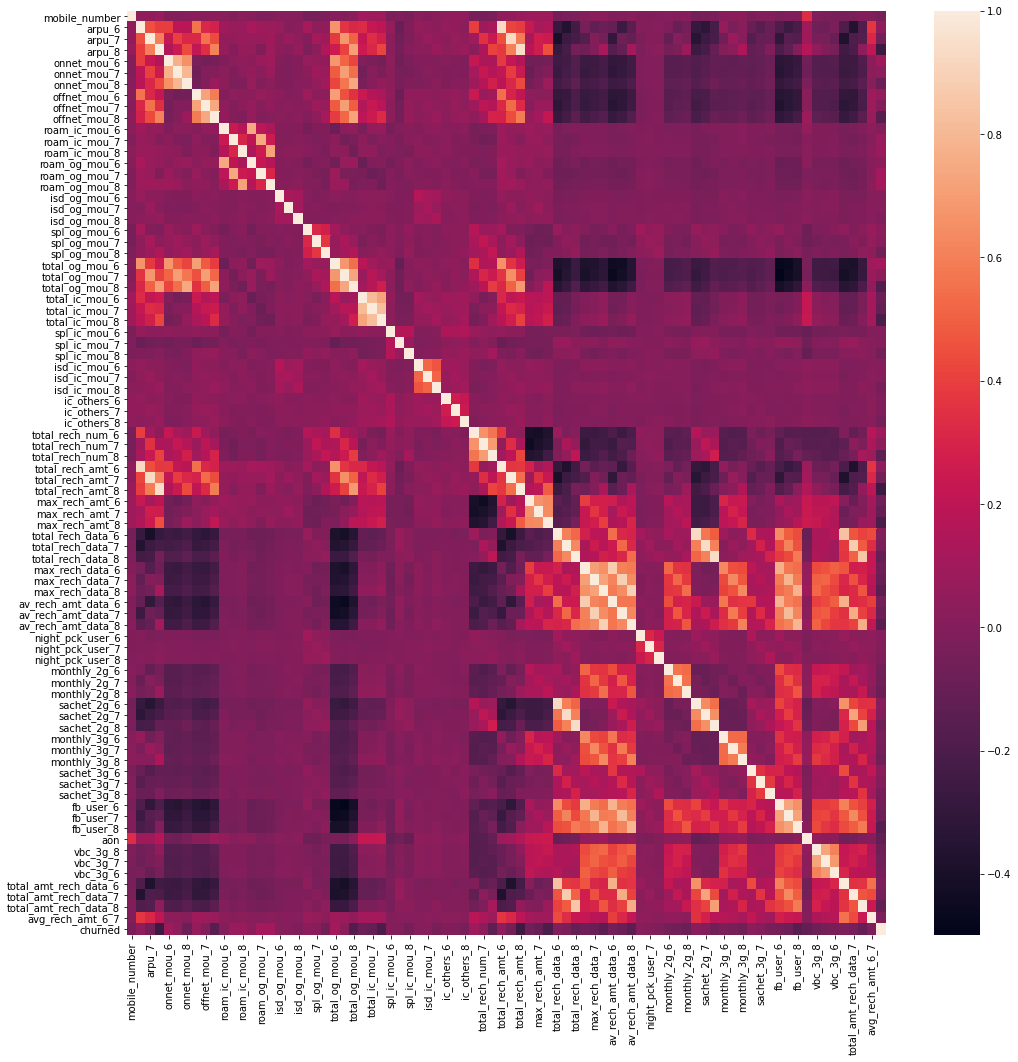

In [414]:
cor = tele_data5.corr()
plt.figure(figsize=(17,17))
sns.heatmap(cor)
plt.show()

In [427]:
tele_data5 = tele_data5.drop(['total_rech_data_6',
'total_rech_data_7',
'total_rech_data_8',
'av_rech_amt_data_6',
'av_rech_amt_data_7',
'av_rech_amt_data_8',
'total_amt_rech_data_6',
'total_amt_rech_data_7',
'total_amt_rech_data_8',
'total_rech_amt_6',
'total_rech_amt_7',
'total_rech_amt_8'], axis=1)

In [429]:
tele_data6 = tele_data5.copy()

In [430]:
tele_data6.shape

(14833, 70)

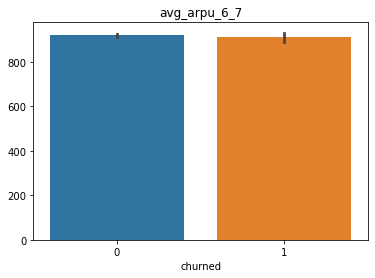

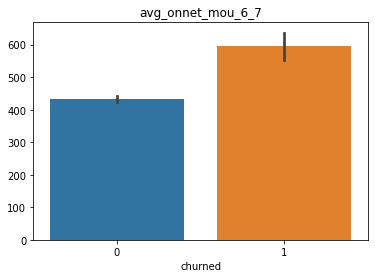

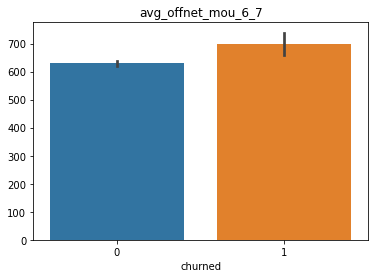

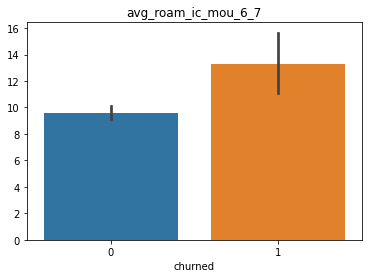

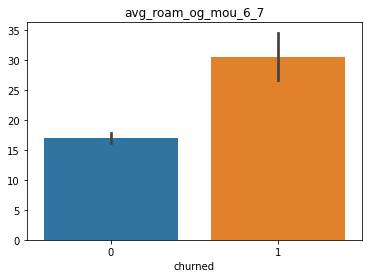

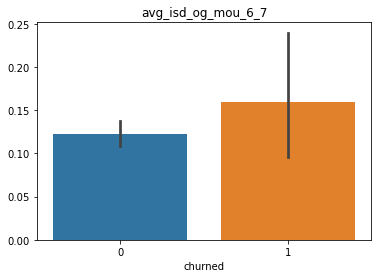

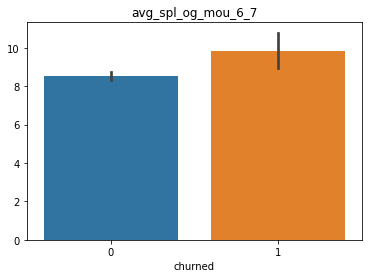

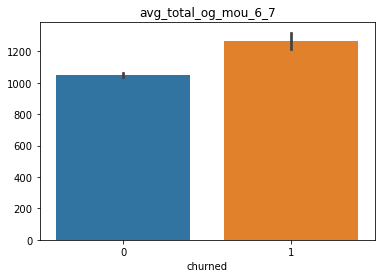

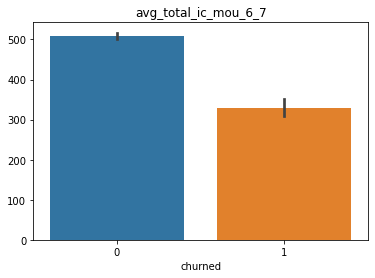

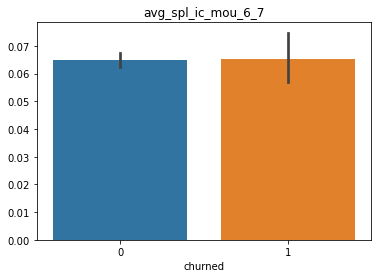

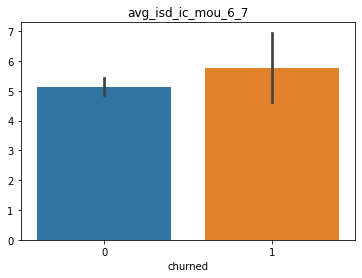

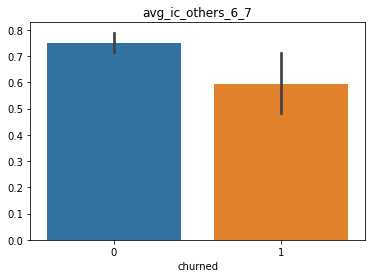

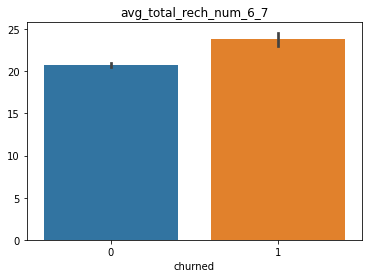

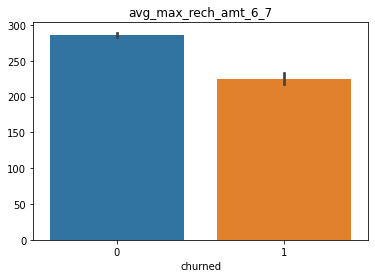

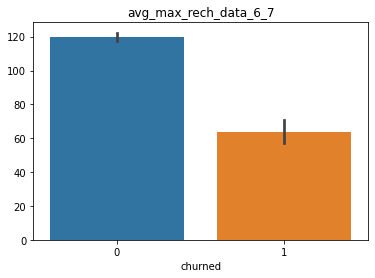

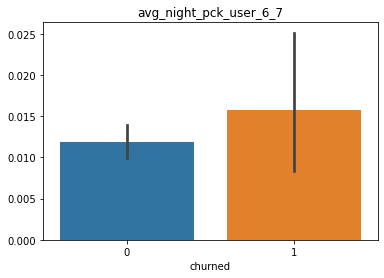

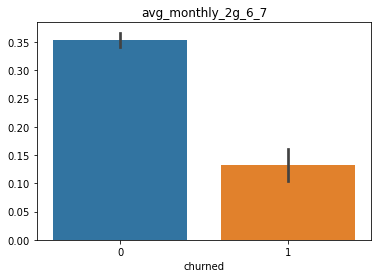

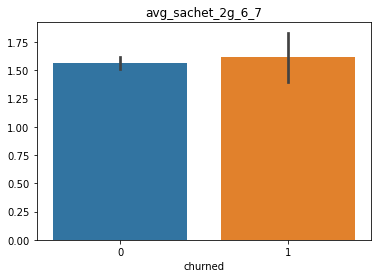

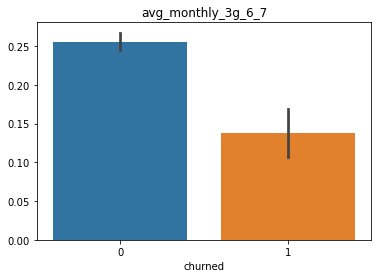

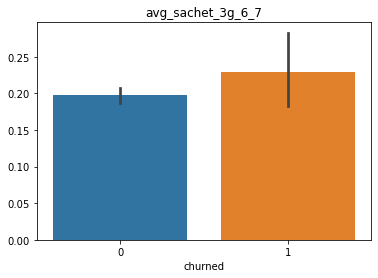

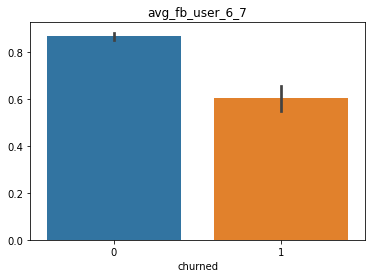

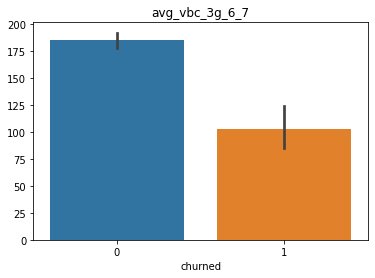

In [431]:
for i in tele_data6.columns:
    if (i != 'churned') & (str(i).find('_6') !=-1) & (str(i).replace('6','7') in tele_data6.columns):
        sns.barplot(tele_data6['churned'], tele_data6[i] + tele_data6[(str(i).replace('6','7'))])                                            
        plt.title('avg_'+i+'_7')
        plt.show()
        #plt.title

## Prepare for Modelling

In [432]:
list(tele_data6.columns)

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',


In [433]:
tele_data6 = tele_data6.drop(['mobile_number'], axis=1)

In [434]:
def sort_correlation_matrix(correlation_matrix):
    cor = correlation_matrix.abs()
    top_col = cor[cor.columns[0]][1:]
    top_col = top_col.sort_values(ascending=False)
    ordered_columns = [cor.columns[0]] + top_col.index.tolist()
    return correlation_matrix[ordered_columns].reindex(ordered_columns)

In [435]:
pd.set_option('display.max_rows', 83)
sort_correlation_matrix(tele_data6.corr())

arpu_6  total_og_mou_6  offnet_mou_6    arpu_7  \
arpu_6            1.000000        0.670317      0.558131  0.450371   
total_og_mou_6    0.670317        1.000000      0.704072  0.384315   
offnet_mou_6      0.558131        0.704072      1.000000  0.311829   
arpu_7            0.450371        0.384315      0.311829  1.000000   
onnet_mou_6       0.392142        0.683714     -0.027651  0.232406   
total_rech_num_6  0.391923        0.341760      0.241426  0.101072   
arpu_8            0.391734        0.254262      0.213126  0.597823   
avg_rech_amt_6_7  0.368931        0.092623      0.096460  0.320281   
total_og_mou_7    0.358080        0.682986      0.454981  0.673296   
total_ic_mou_6    0.329518        0.183683      0.243255  0.218283   
sachet_2g_7      -0.318682       -0.252106     -0.200577 -0.263976   
total_og_mou_8    0.316653        0.543910      0.351161  0.503617   
offnet_mou_7      0.310362        0.479392      0.719859  0.551923   
offnet_mou_8      0.288094        0.387592      0.585040  0.437093   
sachet_2g_6      -0.285485       -0.267708     -0.209750 -0.342593   
fb_user_7        -0.254497       -0.453115     -0.332718 -0.154087   
max_rech_amt_6    0.236105       -0.029586      0.035985  0.119673   
total_ic_mou_7    0.231794        0.102911      0.170554  0.337118   
sachet_2g_8      -0.217909       -0.176898     -0.134253 -0.208885   
fb_user_8        -0.208393       -0.404299     -0.296043 -0.175641   
onnet_mou_7       0.201798        0.490270     -0.070457  0.403560   
total_ic_mou_8    0.198298        0.061018      0.139182  0.277267   
fb_user_6        -0.194015       -0.469952     -0.341335 -0.303766   
onnet_mou_8       0.187473        0.419712     -0.054930  0.314678   
max_rech_amt_8    0.155181       -0.022371      0.025819  0.246395   
sachet_3g_7      -0.151380       -0.168759     -0.132059 -0.101068   
roam_og_mou_6     0.124374       -0.064604      0.020887  0.063539   
total_rech_num_8  0.122584        0.170060      0.102495  0.239477   
max_rech_data_7  -0.121894       -0.366326     -0.261459 -0.000919   
max_rech_amt_7    0.119644       -0.036496      0.019350  0.270020   
spl_og_mou_6      0.117597        0.115682      0.086191  0.003418   
spl_ic_mou_7     -0.098075       -0.111818     -0.086625 -0.061118   
monthly_2g_7     -0.096237       -0.207750     -0.141154  0.006331   
sachet_3g_8      -0.096083       -0.128778     -0.096908 -0.092662   
roam_og_mou_7     0.094380        0.081815      0.067134  0.073639   
roam_ic_mou_6     0.093646       -0.083121     -0.000951  0.056500   
total_rech_num_7  0.091307        0.151239      0.078906  0.350825   
sachet_3g_6      -0.090637       -0.175436     -0.128454 -0.169648   
aon               0.089457       -0.034851      0.016852  0.094959   
roam_og_mou_8     0.085219        0.075843      0.041735  0.094225   
max_rech_data_8  -0.084829       -0.325551     -0.232107 -0.053978   
vbc_3g_7         -0.076157       -0.252727     -0.180456 -0.037680   
roam_ic_mou_8     0.070865        0.039855      0.029975  0.074883   
vbc_3g_8         -0.069793       -0.244563     -0.176311 -0.040820   
roam_ic_mou_7     0.067799        0.028668      0.035771  0.056302   
isd_og_mou_6      0.065478        0.022977      0.031998  0.028175   
spl_ic_mou_6      0.062660        0.064161      0.045613  0.026507   
monthly_3g_6      0.060292       -0.184436     -0.140664 -0.066436   
ic_others_6       0.056456        0.039433      0.047998  0.027266   
isd_ic_mou_6      0.054341        0.037466      0.049613  0.029904   
ic_others_7       0.051386        0.041272      0.061566  0.068961   
monthly_2g_8     -0.050687       -0.183958     -0.125214 -0.030174   
spl_og_mou_8      0.049410        0.064630      0.040845  0.085921   
isd_ic_mou_7      0.042241        0.030947      0.040386  0.063826   
max_rech_data_6  -0.042179       -0.379632     -0.274367 -0.169043   
churned           0.040202        0.104809      0.054275 -0.050744   
spl_og_mou_7      0.035196    

In [436]:
tele_data6[cat_cols].head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  fb_user_7  \
1                 0                 0                 0          0          1   
2                 0                 0                 0          0          0   
3                 0                 0                 0          0          0   
4                 0                 0                 0          0          1   
6                 0                 0                 0          0          0   

   fb_user_8  
1          1  
2          0  
3          0  
4          1  
6          0

In [439]:
num_cols = list(set(num_cols).difference(set(['total_rech_data_6','mobile_number',
'total_rech_data_7',
'total_rech_data_8',
'av_rech_amt_data_6',
'av_rech_amt_data_7',
'av_rech_amt_data_8',
'total_amt_rech_data_6',
'total_amt_rech_data_7',
'total_amt_rech_data_8',
'total_rech_amt_6',
'total_rech_amt_7',
'total_rech_amt_8'])))

In [441]:
tele_data6[num_cols].head()

monthly_2g_7  isd_og_mou_6  max_rech_amt_8  total_ic_mou_8  onnet_mou_6  \
1             1           0.0              30           16.54       413.69   
2             0           0.0             130          294.46        50.51   
3             0           0.0              50          261.04       102.41   
4             0           0.0             179          298.33        48.96   
6             0           0.0             130           49.64       248.99   

   sachet_3g_6  spl_og_mou_8  max_rech_amt_7  total_og_mou_7  spl_ic_mou_6  \
1            0         10.23             154          431.66           0.0   
2            0          5.91             110          286.01           0.0   
3            0          0.00              50         1028.79           0.0   
4            0         17.71             179          140.04           0.0   
6            0          0.00             110          670.54           0.0   

   roam_ic_mou_8  roam_ic_mou_7  spl_og_mou_7  spl_ic_mou_7  max_rech_amt_6  \
1            0.0           0.00          0.00           0.0              90   
2            0.0           2.83          3.26           0.0             110   
3            0.0           0.00          0.00           0.0              50   
4            0.0           0.00          0.00           0.0               0   
6            0.0           0.00          0.00           0.0              30   

   monthly_3g_6  max_rech_data_8  ic_others_6  monthly_3g_8  total_ic_mou_7  \
1             0             23.0          0.0             0           28.49   
2             0              0.0          0.0             0          381.56   
3             0              0.0          0.0             0          131.89   
4             0            179.0          0.0             1          222.89   
6             0              0.0          0.0             0           67.94   

   total_rech_num_7  isd_og_mou_8   aon  isd_og_mou_7  isd_ic_mou_7  ...  \
1                21           0.0   315          0.00          0.00  ...   
2                 6           0.0   511          0.00          0.00  ...   
3                26           0.0   720          0.00          0.00  ...   
4                 5           0.0   604          0.01         28.23  ...   
6                22           0.0  1155          0.00         19.08  ...   

   monthly_2g_6  sachet_2g_6  isd_ic_mou_6  vbc_3g_6  offnet_mou_8  \
1             0            0           0.0    122.16        136.48   
2             0            0           0.0     21.89        162.76   
3             0            0           0.0      0.00        983.39   
4             0            0           0.0      0.00        205.89   
6             0            0           0.0      0.00         97.81   

   spl_ic_mou_8  roam_ic_mou_6  vbc_3g_7  ic_others_7  sachet_2g_7  \
1           0.0            0.0    910.65         0.00            1   
2           0.0            0.0      2.45         0.00            0   
3           0.0            0.0      0.00         0.00            0   
4           0.0            0.0     51.86         5.35            0   
6           0.0            0.0      0.00         0.00            0   

   total_rech_num_8  roam_og_mou_6  monthly_2g_8  total_ic_mou_6  \
1                14            0.0             0          103.86   
2                 2            0.0             0          364.86   
3                27            0.0             0          207.09   
4                 4            0.0             0          119.58   
6                 6            0.0             0           70.79   

   isd_ic_mou_8   arpu_6  max_rech_data_6  roam_og_mou_8  max_rech_data_7  \
1          0.00  378.721              0.0            0.0            154.0   
2          0.23  430.975              0.0            0.0              0.0   
3          0.00  514.453              0.0            0.0              0.0   
4          3.74   74.350              0.0            0.0            179.0   
6          1.20  363.9

In [444]:
X = tele_data6.drop(['churned'], axis=1)

In [446]:
X.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       '

In [452]:
y = tele_data6['churned']

In [449]:
std_scaler = StandardScaler()

In [451]:
cols = list(set(X.columns).difference(set(cat_cols)))
X[cols] = std_scaler.fit_transform(X[cols])
#X.columns = cols
X.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
1 -0.419149  0.195813 -1.131607     0.648425     0.440487    -0.558727   
2 -0.168534 -0.741674 -0.916655    -0.579176    -0.496408    -0.429570   
3  0.231835  0.710140  0.996983    -0.403746    -0.299911    -0.376751   
4 -1.878943 -1.258156 -0.154919    -0.584415    -0.575378    -0.564180   
6 -0.489815  0.168203 -0.040309     0.091715     1.350021     1.736151   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
1     -0.742372     -0.792662     -0.503426      -0.268014      -0.250598   
2     -0.079149     -0.285353     -0.405098      -0.268014      -0.026845   
3      1.439327      1.983739      2.665317      -0.268014      -0.250598   
4     -0.772799     -0.762960     -0.243726      -0.268014      -0.250598   
6     -0.761450     -0.894899     -0.648111      -0.268014      -0.250598   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  isd_og_mou_6  \
1      -0.239892      -0.292565      -0.278707      -0.268995     -0.143942   
2      -0.239892      -0.292565       0.548485      -0.268995     -0.143942   
3      -0.239892      -0.292565      -0.278707      -0.268995     -0.143942   
4      -0.239892      -0.292565      -0.278707      -0.268995     -0.143942   
6      -0.239892      -0.292565      -0.278707      -0.268995     -0.143942   

   isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
1     -0.102232     -0.120548     -0.501233     -0.549886      0.670044   
2     -0.102232     -0.120548     -0.501233     -0.163250      0.174081   
3     -0.102232     -0.120548     -0.501233     -0.549886     -0.504425   
4     -0.089890     -0.120548     -0.488628     -0.549886      1.528795   
6     -0.102232     -0.120548     -0.501233     -0.549886     -0.504425   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  total_ic_mou_6  ...  \
1       -0.055352       -0.236057       -0.706910       -0.647919  ...   
2       -0.440613       -0.585750       -0.552129        0.528506  ...   
3        0.784041        1.197600        1.538894       -0.182623  ...   
4       -0.947211       -0.936211       -0.536856       -0.577063  ...   
6       -0.461957        0.337473        0.776881       -0.796978  ...   

   max_rech_data_7  max_rech_data_8  night_pck_user_6  night_pck_user_7  \
1         1.184942        -0.377472                 0                 0   
2        -0.687846        -0.661836                 0                 0   
3        -0.687846        -0.661836                 0                 0   
4         1.488966         1.551257                 0                 0   
6        -0.687846        -0.661836                 0                 0   

   night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  \
1                 0     -0.399678      1.918356      -0.37789    -0.449893   
2                 0     -0.399678     -0.390177      -0.37789    -0.449893   
3                 0     -0.399678     -0.390177      -0.37789    -0.449893   
4                 0     -0.399678     -0.390177      -0.37789    -0.449893   
6                 0     -0.399678     -0.390177      -0.37789    -0.449893   

   sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
1     0.106594     1.465773     -0.329662     -0.314767     -0.312091   
2    -0.440883    -0.443246     -0.329662     -0.314767     -0.312091   
3    -0.440883    -0.443246     -0.329662     -0.314767     -0.312091   
4    -0.440883    -0.443246     -0.329662      4.881605      2.486725   
6    -0.440883    -0.443246     -0.329662     -0.314767     -0.312091   

   sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
1    -0.277865    -0.257142    -0.236427          0          1          1   
2    -0.277865    -0.257142    -0.236427          0          0          0   
3    -0.277865    -0.257142    -0.236427          0          0          0   
4    -0.277865    -0.257142     3.405242          0        

### Splitting the data into train and test

In [543]:

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### PCA on the data

In [544]:
from sklearn.decomposition import PCA

In [545]:
pca = PCA(random_state=42)

In [546]:
pca.fit(X_train)

PCA(random_state=42)

#### Components from the PCA

In [547]:
pca.components_

array([[ 1.51333213e-01,  1.74820288e-01,  1.37614694e-01, ...,
        -1.84401846e-01, -1.76410684e-01, -1.20393885e-02],
       [ 1.86051988e-01,  2.29208341e-01,  2.51123728e-01, ...,
         1.28641734e-01,  1.11286409e-01,  8.40163891e-02],
       [-3.35707120e-02, -9.64917145e-02, -1.49267633e-01, ...,
        -1.12792396e-01, -9.65970110e-02, -2.63727187e-01],
       ...,
       [ 1.00247029e-04, -2.86752681e-04, -9.55664470e-05, ...,
         1.29671366e-04,  1.59879193e-04, -1.60249229e-06],
       [ 5.11753768e-05, -5.46039668e-07, -1.57484778e-05, ...,
         2.39067970e-05, -8.34380144e-06,  9.62295544e-05],
       [-1.09402413e-04, -1.15398359e-04,  2.73515315e-05, ...,
        -1.37309235e-05,  1.99063215e-05, -3.57182115e-05]])

In [548]:
pca.explained_variance_ratio_

array([1.37519195e-01, 9.41143214e-02, 5.13918486e-02, 4.76281248e-02,
       4.25072574e-02, 3.53763355e-02, 3.41638381e-02, 3.35044910e-02,
       2.94631042e-02, 2.63464662e-02, 2.56768217e-02, 2.38657344e-02,
       2.30566281e-02, 2.27010864e-02, 1.98464179e-02, 1.91847289e-02,
       1.85128519e-02, 1.72548345e-02, 1.68075501e-02, 1.48863013e-02,
       1.45954219e-02, 1.41525619e-02, 1.31242263e-02, 1.27128337e-02,
       1.25101116e-02, 1.23990564e-02, 1.19551211e-02, 1.17501214e-02,
       1.13739809e-02, 1.03635084e-02, 9.63464929e-03, 9.26402013e-03,
       8.97571783e-03, 8.58453530e-03, 8.27604473e-03, 8.17871354e-03,
       7.75983251e-03, 7.68502313e-03, 6.77905313e-03, 5.54866076e-03,
       5.38255462e-03, 5.34134105e-03, 4.80514995e-03, 4.51569482e-03,
       3.99446526e-03, 3.78733504e-03, 3.63708434e-03, 3.56631301e-03,
       3.46743335e-03, 3.31140665e-03, 2.93840320e-03, 2.49826707e-03,
       2.13452011e-03, 2.07965150e-03, 1.92969216e-03, 1.56909921e-03,
      

Making a scree plot for the explained variance

In [549]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

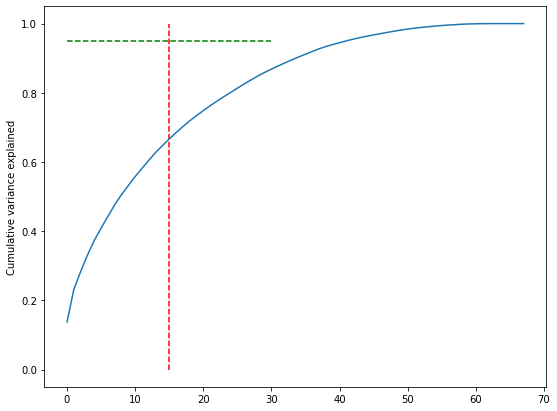

In [550]:
fig = plt.figure(figsize=[9,7])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [551]:
from sklearn.decomposition import IncrementalPCA

In [555]:
pca_final = IncrementalPCA(n_components=18)

In [556]:
df_train_pca = pca_final.fit_transform(X_train)

In [557]:
df_train_pca.shape

(10383, 18)

In [558]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [559]:
corrmat.shape

(18, 18)

#### Plotting the heatmap

<AxesSubplot:>

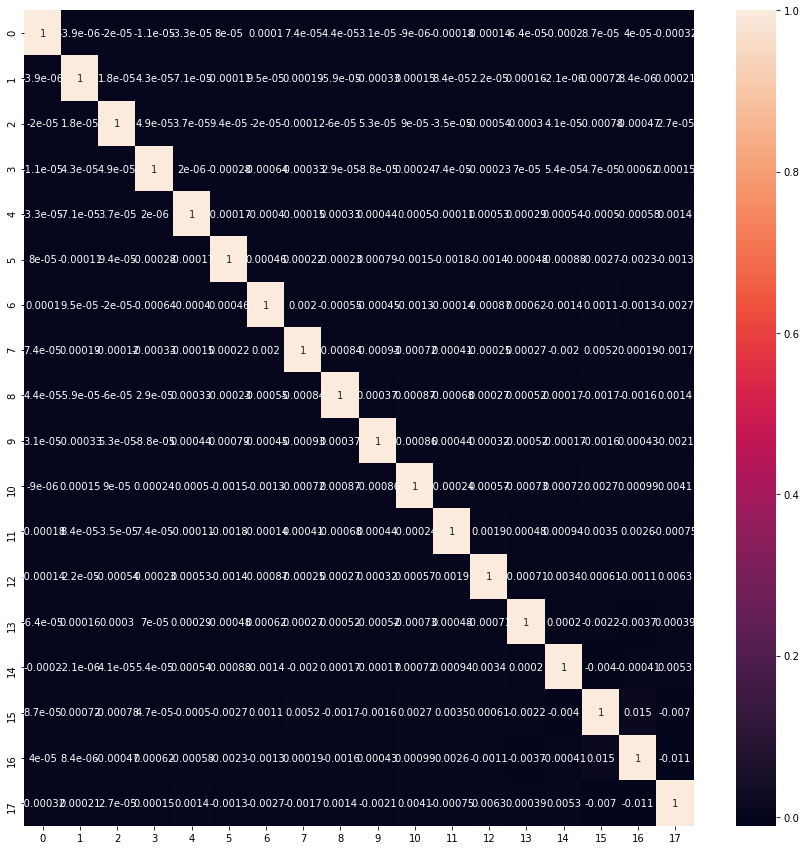

In [560]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [584]:
#df_train_pca

#### Using smote for the imbalance data ratio in the churn and not churned

In [582]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#to balance the imbalanced dataset
smt = SMOTE(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

# New count after balancing -> {0: 900, 1: 900}
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 13878, 1: 13878})


In [583]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                19428
Model:                            GLM   Df Residuals:                    19359
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7010.2
Date:                Wed, 24 Nov 2021   Deviance:                       14020.
Time:                        22:50:47   Pearson chi2:                 3.64e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1640      0.066     -2.492      0.013      -0.293      -0.035
arpu_6               0.2570      0.063      4.068      0.000       0.133       0.381
arpu_7               0.2563      0.065      3.937      0.000       0.129       0.384
arpu_8              -0.3047      0.077     -3.973      0.000      -0.455      -0.154
onnet_mou_6          4.2176      3.018      1.398      0.162      -1.697      10.132
onnet_mou_7         -8.0314      2.714     -2.959      0.003     -13.351      -2.712
onnet_mou_8          8.5512      2.939      2.910      0.004       2.792      14.311
offnet_mou_6         4.3208      3.101      1.393      0.164      -1.757      10.399
offnet_mou_7        -7.8288      2.701     -2.899      0.004     -13.122      -2.535
offnet_mou_8         8.0364      2.855      2.815      0.005       2.441      13.631
roam_ic_mou_6       -0.2173      0.041     -5.260      0.000      -0.298      -0.136
roam_ic_mou_7       -0.0072      0.033     -0.219      0.827      -0.071       0.057
roam_ic_mou_8        0.0096      0.032      0.301      0.763      -0.053       0.072
roam_og_mou_6       -0.4873      0.415     -1.174      0.240      -1.301       0.326
roam_og_mou_7        0.6381      0.199      3.200      0.001       0.247       1.029
roam_og_mou_8       -0.5324      0.292     -1.826      0.068      -1.104       0.039
isd_og_mou_6        -0.0876      0.026     -3.330      0.001      -0.139      -0.036
isd_og_mou_7         0.0270      0.023      1.188      0.235      -0.018       0.071
isd_og_mou_8         0.0445      0.024      1.866      0.062      -0.002       0.091
spl_og_mou_6        -0.0980      0.028     -3.462      0.001      -0.153      -0.043
spl_og_mou_7        -0.1106      0.032     -3.466      0.001      -0.173      -0.048
spl_og_mou_8        -0.0788      0.038     -2.063      0.039      -0.154      -0.004
total_og_mou_6      -5.9550      4.277     -1.392      0.164     -14.337       2.427
total_og_mou_7      11.5874      3.827      3.028      0.002       4.086      19.089
total_og_mou_8     -12.8417      4.268     -3.009      0.003     -21.206      -4.477
total_ic_mou_6       0.1432      0.050      2.888      0.004       0.046       0.240
total_ic_mou_7       0.3320      0.060      5.517      0.000       0.214       0.450
total_ic_mou_8      -1.2766      0.072    -17.690      0.000      -1.418      -1.135
spl_ic_mou_6        -0.0147      0.025     -0.598      0.550      -0.063       0.034
spl_ic_mou_7        -0.0773      0.025     -3.064      0.002      -0.127      -0.028
spl_ic_mou_8        -0.3799      0.040     -9.496      0.000      -0.458      -0.301
isd_ic_mou_6         0.0233      0.031      0.748      0.454      -0.038       0.084
isd_ic_mou_7         0.0109      0.031      0.354      0.723      -0.049       0.071
isd_ic_mou_8        -0.

### Feature selection uing RFE

In [567]:
# running RFE with 15 variables as output
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X,y)

In [568]:
# Printing the boolean results
print(rfe.support_)           

[False False  True False False False False False False False False False
 False False  True False False False False False False False False  True
 False  True  True False False  True False False False False False False
 False  True  True False False  True False False  True False  True  True
 False  True False False False False False False False False False False
 False False  True  True False False False False]


In [569]:
print(rfe.ranking_) 

[36 16  1  2 12 45  4 31 13 20 14 50 19 52  1 48 35 38 42 54 23 25 11  1
 15  1  1 49 43  1 34 46 44 33 53 37 47  1  1  7  8  1  6 40  1 32  1  1
 28  1 24 26 17  5  9 39 51 18 29 30  3 41  1  1 21 10 22 27]


In [570]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 36),
 ('arpu_7', False, 16),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 2),
 ('onnet_mou_7', False, 12),
 ('onnet_mou_8', False, 45),
 ('offnet_mou_6', False, 4),
 ('offnet_mou_7', False, 31),
 ('offnet_mou_8', False, 13),
 ('roam_ic_mou_6', False, 20),
 ('roam_ic_mou_7', False, 14),
 ('roam_ic_mou_8', False, 50),
 ('roam_og_mou_6', False, 19),
 ('roam_og_mou_7', False, 52),
 ('roam_og_mou_8', True, 1),
 ('isd_og_mou_6', False, 48),
 ('isd_og_mou_7', False, 35),
 ('isd_og_mou_8', False, 38),
 ('spl_og_mou_6', False, 42),
 ('spl_og_mou_7', False, 54),
 ('spl_og_mou_8', False, 23),
 ('total_og_mou_6', False, 25),
 ('total_og_mou_7', False, 11),
 ('total_og_mou_8', True, 1),
 ('total_ic_mou_6', False, 15),
 ('total_ic_mou_7', True, 1),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_6', False, 49),
 ('spl_ic_mou_7', False, 43),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_6', False, 34),
 ('isd_ic_mou_7', False, 46),
 ('isd_ic_mou_8', False, 44),
 ('ic_others_6', False, 33)

In [571]:
col = X_train.columns[rfe.support_]

In [572]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'total_rech_num_6', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_data_6', 'max_rech_data_7', 'night_pck_user_6',
       'monthly_2g_6', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7',
       'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'avg_rech_amt_6_7'],
      dtype='object')

In [573]:
#Using Statsmodel

In [574]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                19428
Model:                            GLM   Df Residuals:                    19412
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7390.0
Date:                Wed, 24 Nov 2021   Deviance:                       14780.
Time:                        22:44:39   Pearson chi2:                 9.12e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7017      0.043    -16.197      0.000      -0.787      -0.617
arpu_8              -0.4597      0.059     -7.852      0.000      -0.574      -0.345
roam_og_mou_8        0.3585      0.022     16.288      0.000       0.315       0.402
total_og_mou_8      -0.1938      0.043     -4.497      0.000      -0.278      -0.109
total_ic_mou_7       0.5579      0.046     12.084      0.000       0.467       0.648
total_ic_mou_8      -1.4570      0.067    -21.873      0.000      -1.588      -1.326
spl_ic_mou_8        -0.4198      0.040    -10.615      0.000      -0.497      -0.342
total_rech_num_7     0.2742      0.030      9.209      0.000       0.216       0.333
total_rech_num_8    -0.4352      0.041    -10.606      0.000      -0.516      -0.355
max_rech_amt_8      -0.3453      0.039     -8.947      0.000      -0.421      -0.270
max_rech_data_8      0.4089      0.054      7.616      0.000       0.304       0.514
night_pck_user_7    -1.8031      0.680     -2.652      0.008      -3.136      -0.470
night_pck_user_8    -0.9446      1.051     -0.899      0.369      -3.004       1.115
monthly_2g_7        -0.3412      0.036     -9.462      0.000      -0.412      -0.270
fb_user_8           -2.7763      0.095    -29.204      0.000      -2.963      -2.590
aon                 -0.4453      0.028    -15.783      0.000      -0.501      -0.390
====================================================================================
"""

In [575]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [576]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03014858, 0.78716369, 0.43510989, 0.74061997, 0.2454484 ,
       0.08165405, 0.00918319, 0.0402149 , 0.01105164, 0.64337425])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [577]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churn  Churn_Prob
0      0    0.030149
1      1    0.787164
2      0    0.435110
3      0    0.740620
4      0    0.245448

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [578]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [579]:
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.030149          0
1      1    0.787164          1
2      0    0.435110          0
3      0    0.740620          1
4      0    0.245448          0

In [580]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[8144 1570]
 [1455 8259]]


In [581]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8442968910850319


### Getting 84.4% is pretty good.

In [499]:
#checking VIF

In [498]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0             arpu_8  7.86
4     total_ic_mou_8  4.43
2     total_og_mou_8  3.99
3     total_ic_mou_7  3.18
8     max_rech_amt_8  3.00
7   total_rech_num_8  2.90
9    max_rech_data_8  2.58
6   total_rech_num_7  1.76
13         fb_user_8  1.54
14               aon  1.29
12      monthly_2g_7  1.24
1      roam_og_mou_8  1.18
10  night_pck_user_7  1.12
11  night_pck_user_8  1.12
5       spl_ic_mou_8  1.05

In [500]:
col = col.drop('arpu_8', 1)
col

Index(['roam_og_mou_8', 'total_og_mou_8', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_amt_8', 'max_rech_data_8', 'night_pck_user_7',
       'night_pck_user_8', 'monthly_2g_7', 'fb_user_8', 'aon'],
      dtype='object')

### Hyper parameter Tuning

In [591]:
dt = DecisionTreeClassifier(random_state=42)

In [593]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [601]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [607]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Not churned', "Churned"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [594]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [595]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   54.8s finished


Wall time: 58.3 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [596]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.382274      0.014134         0.021440        0.007671   
1       0.383768      0.013219         0.022215        0.005187   
2       0.326257      0.031027         0.016006        0.002045   
3       0.325096      0.032436         0.016977        0.001053   
4       0.330250      0.008809         0.015053        0.002670   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.837142   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.837142   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.837142   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.837142   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.837142   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.854437           0.845995            0.84579         0.845841   
1           0.854437           0.845995            0.84579         0.845841   
2           0.854437           0.845995            0.84579         0.845841   
3           0.854437           0.845995            0.84579         0.845841   
4           0.854437           0.845995            0.84579         0.845841   

   std_test_score  rank_test_score  
0        0.006115               46  
1        0.006115               46  
2        0.006115               46  
3        0.006115               46  
4        0.006115               46

In [597]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
20       1.830665      0.066341         0.013038        0.001895   
45       2.153951      0.043162         0.012195        0.001781   
15       1.216049      0.043427         0.014753        0.000854   
46       2.007984      0.058285         0.013990        0.000750   
40       1.787508      0.067903         0.012614        0.001148   

   param_criterion param_max_depth param_min_samples_leaf  \
20            gini              20                      5   
45         entropy              20                      5   
15            gini              10                      5   
46         entropy              20                     10   
40         entropy              10                      5   

                                               params  split0_test_score  \
20  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.907556   
45  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.901997   
15  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.907968   
46  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.903232   
40  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.901791   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
20           0.925057           0.931645           0.923615         0.921968   
45           0.923821           0.924645           0.931851         0.920579   
15           0.923615           0.928351           0.918880         0.919704   
46           0.916615           0.923204           0.925057         0.917027   
40           0.914350           0.920527           0.929174         0.916461   

    std_test_score  rank_test_score  
20        0.008854                1  
45        0.011173                2  
15        0.007558                3  
46        0.008560                4  
40        0.009973                5

In [598]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [599]:
dt_best = grid_search.best_estimator_

In [602]:
evaluate_model(dt_best)

Train Accuracy : 0.9707638459954705
Train Confusion Matrix:
[[9416  298]
 [ 270 9444]]
--------------------------------------------------
Test Accuracy : 0.8851685393258427
Test Confusion Matrix:
[[3780  384]
 [ 127  159]]


In [604]:
from sklearn.metrics import classification_report

In [605]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      4164
           1       0.29      0.56      0.38       286

    accuracy                           0.89      4450
   macro avg       0.63      0.73      0.66      4450
weighted avg       0.92      0.89      0.90      4450



In [608]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.849612 to fit



In [609]:
#as the max depth is 20 it is difficult to view it.

In [613]:
from sklearn.ensemble import RandomForestClassifier

In [614]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [615]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [616]:
classifier_rf.feature_importances_

array([1.47700301e-03, 5.04229308e-03, 1.01592106e-01, 1.38413619e-03,
       1.93626566e-03, 1.55484112e-02, 1.94618439e-03, 1.49197076e-03,
       3.88912150e-02, 1.67606104e-03, 2.84224255e-02, 1.42736729e-01,
       9.08172809e-04, 1.66030654e-02, 1.20362477e-01, 8.45435975e-05,
       3.26244943e-04, 2.15224385e-05, 2.61452685e-03, 5.12167178e-03,
       3.76700939e-03, 2.44616738e-03, 3.18516384e-03, 6.68531132e-02,
       4.99428457e-03, 6.35988833e-03, 1.03341592e-01, 1.24086369e-03,
       1.23883568e-04, 1.43086741e-03, 9.32279939e-04, 9.24633116e-04,
       2.92631541e-04, 1.97331366e-03, 5.37430730e-04, 3.46140146e-03,
       1.96338764e-03, 3.25118124e-03, 2.50675291e-02, 7.99029797e-03,
       9.13030680e-03, 8.88702693e-02, 2.74317424e-03, 8.91257106e-03,
       4.61917298e-02, 1.17253455e-05, 0.00000000e+00, 4.82991153e-05,
       1.20745853e-03, 1.20826330e-03, 3.15858590e-03, 5.74720735e-04,
       1.11527757e-03, 6.86813115e-03, 2.66347782e-04, 8.32467902e-04,
      

In [617]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [618]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
11     roam_ic_mou_8  0.142737
14     roam_og_mou_8  0.120362
26    total_ic_mou_8  0.103342
2             arpu_8  0.101592
41    max_rech_amt_8  0.088870
..               ...       ...
47  night_pck_user_8  0.000048
17      isd_og_mou_8  0.000022
45  night_pck_user_6  0.000012
59       sachet_3g_8  0.000000
46  night_pck_user_7  0.000000

[68 rows x 2 columns]

#### some important variables from all the above model

In [621]:
['roam_og_mou_8', 'total_og_mou_8', 'total_ic_mou_7', 'arpu_8' ,'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_amt_8', 'max_rech_data_8', 'night_pck_user_7',
       'night_pck_user_8', 'monthly_2g_7', 'fb_user_8', 'aon']

['roam_og_mou_8',
 'total_og_mou_8',
 'total_ic_mou_7',
 'arpu_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_7',
 'total_rech_num_8',
 'max_rech_amt_8',
 'max_rech_data_8',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_7',
 'fb_user_8',
 'aon']

In [624]:
#roam_og_mou_8     - provide more offer related to roaming recharge, discounts
#total_og_mou_8    - this includes outgoing calls in total, local, std, isd outgoings, so should increase the customer attraction
#                    in getting the customer to make calls
#total_ic_mou_7    - provide facility for user to receive incoming calls.

#similar goes to all the above columns